In [1]:
!pip install statsmodels

In [2]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.9 MB/s eta 0:00:00


In [ ]:
!pip install sktime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 8.6 MB/s eta 0:00:00


**ARIMA MODEL**

In [ ]:
import pandas as pd
import numpy as np
import pmdarima as pm
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

In [ ]:
df_ar = pd.read_csv('/content/Integrated_Dataset_Component_4.csv')


In [ ]:
#Create four dataframe for each junction
df_junction_1 = df_ar[df_ar['Junction'] == 1]
df_junction_2 = df_ar[df_ar['Junction'] == 2]
df_junction_3 = df_ar[df_ar['Junction'] == 3]
df_junction_4 = df_ar[df_ar['Junction'] == 4]

In [ ]:
df_junction_4.head()

,DateTime,ID,Humidity,Temperature(C),Wind Speed(Kmph),Junction,Vehicles,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),...,holiday_Rath Yatra (R),holiday_Republic Day (G),holiday_Shivaji Jayanti (R),holiday_Swami Dayananda Saraswati Jayanti (R),holiday_Vaisakhadi(Bengal)/Bahag Bihu (Assam) (R),holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted
30747,2017-01-01 00:00:00,20170101004,0.314489,-1.546872,-1.600262,4,3,False,False,False,...,False,False,False,False,False,False,False,False,False,True
30751,2017-01-01 01:00:00,20170101014,0.354001,-1.546872,-1.600262,4,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
30755,2017-01-01 02:00:00,20170101024,0.354001,-1.546872,-1.381122,4,4,False,False,False,...,False,False,False,False,False,False,False,False,False,True
30759,2017-01-01 03:00:00,20170101034,0.393512,-1.752897,-1.381122,4,4,False,False,False,...,False,False,False,False,False,False,False,False,False,True
30763,2017-01-01 04:00:00,20170101044,0.116932,-1.340847,-1.161982,4,2,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
#Convert DateTime from object type to datetime64[ns] type
df_junction_1 = df_junction_1.astype({"DateTime":'datetime64[ns]'})
df_junction_2 = df_junction_2.astype({"DateTime":'datetime64[ns]'})
df_junction_3 = df_junction_3.astype({"DateTime":'datetime64[ns]'})
df_junction_4 = df_junction_4.astype({"DateTime":'datetime64[ns]'})

<ipython-input-9-a05114649842>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_junction_1 = df_junction_1.astype({"DateTime":'datetime64[ns]'})
<ipython-input-9-a05114649842>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_junction_2 = df_junction_2.astype({"DateTime":'datetime64[ns]'})
<ipython-input-9-a05114649842>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_junction_3 = df_junction_3.astype({"DateTime":'datetime64[ns]'})
<ipython-input-9-a05114649842>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dat

In [ ]:
#Create feature 'Hour' and 'Day_Of_Week' from DateTime for each junction
df_junction_1['Hour'] = df_junction_1['DateTime'].dt.hour
df_junction_1['Day_Of_Week'] = df_junction_1['DateTime'].dt.dayofweek
df_junction_2['Hour'] = df_junction_2['DateTime'].dt.hour
df_junction_2['Day_Of_Week'] = df_junction_2['DateTime'].dt.dayofweek
df_junction_3['Hour'] = df_junction_3['DateTime'].dt.hour
df_junction_3['Day_Of_Week'] = df_junction_3['DateTime'].dt.dayofweek
df_junction_4['Hour'] = df_junction_4['DateTime'].dt.hour
df_junction_4['Day_Of_Week'] = df_junction_4['DateTime'].dt.dayofweek

In [ ]:
#Make DateTime as index
df_junction_1.set_index('DateTime', inplace=True)
df_junction_2.set_index('DateTime', inplace=True)
df_junction_3.set_index('DateTime', inplace=True)
df_junction_4.set_index('DateTime', inplace=True)

In [ ]:
df_junction_1.sort_index(inplace=True)
df_junction_2.sort_index(inplace=True)
df_junction_3.sort_index(inplace=True)
df_junction_4.sort_index(inplace=True)

In [ ]:
df_junction_4.head()

,ID,Humidity,Temperature(C),Wind Speed(Kmph),Junction,Vehicles,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),holiday_Chaitra Sukladi/Gudi Padava/Ugadi/Cheti Chand (R),...,holiday_Shivaji Jayanti (R),holiday_Swami Dayananda Saraswati Jayanti (R),holiday_Vaisakhadi(Bengal)/Bahag Bihu (Assam) (R),holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted,Hour,Day_Of_Week
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20170101004,0.314489,-1.546872,-1.600262,4,3,False,False,False,False,...,False,False,False,False,False,False,False,True,0,6
2017-01-01 01:00:00,20170101014,0.354001,-1.546872,-1.600262,4,1,False,False,False,False,...,False,False,False,False,False,False,False,True,1,6
2017-01-01 02:00:00,20170101024,0.354001,-1.546872,-1.381122,4,4,False,False,False,False,...,False,False,False,False,False,False,False,True,2,6
2017-01-01 03:00:00,20170101034,0.393512,-1.752897,-1.381122,4,4,False,False,False,False,...,False,False,False,False,False,False,False,True,3,6
2017-01-01 04:00:00,20170101044,0.116932,-1.340847,-1.161982,4,2,False,False,False,False,...,False,False,False,False,False,False,False,True,4,6


# Drop Duplicates form DataFrame

In [ ]:
df_junction_1.shape

(14592, 59)

In [ ]:
df_junction_1.drop_duplicates(inplace=True)

In [ ]:
df_junction_1.shape

(14592, 59)

In [ ]:
df_junction_2.shape

(14592, 59)

In [ ]:
df_junction_2.drop_duplicates(inplace=True)

In [ ]:
df_junction_2.shape

(14592, 59)

In [ ]:
df_junction_3.shape

(14592, 59)

In [ ]:
df_junction_3.drop_duplicates(inplace=True)

In [ ]:
df_junction_3.shape

(14592, 59)

In [ ]:
df_junction_4.shape

(4344, 59)

In [ ]:
df_junction_4.drop_duplicates(inplace=True)

In [ ]:
df_junction_4.shape

(4344, 59)

In [ ]:
#Convert TimeSeries into hourly frequency
df_junction_1 = df_junction_1.asfreq("H")
df_junction_2 = df_junction_2.asfreq("H")
df_junction_3 = df_junction_3.asfreq("H")
df_junction_4 = df_junction_4.asfreq("H")

# Fill missing value

In [ ]:
#Fill Missing values
df_junction_1.fillna(method="ffill",inplace=True)
df_junction_2.fillna(method="ffill",inplace=True)
df_junction_3.fillna(method="ffill",inplace=True)
df_junction_4.fillna(method="ffill",inplace=True)

<ipython-input-26-cb7eb3e6dce2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_junction_1.fillna(method="ffill",inplace=True)
<ipython-input-26-cb7eb3e6dce2>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_junction_2.fillna(method="ffill",inplace=True)
<ipython-input-26-cb7eb3e6dce2>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_junction_3.fillna(method="ffill",inplace=True)
<ipython-input-26-cb7eb3e6dce2>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_junction_4.fillna(method="ffill",inplace=True)


#Seasonal decompose for junction 1

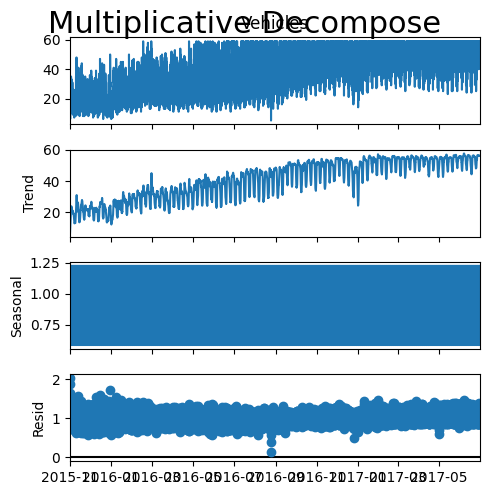

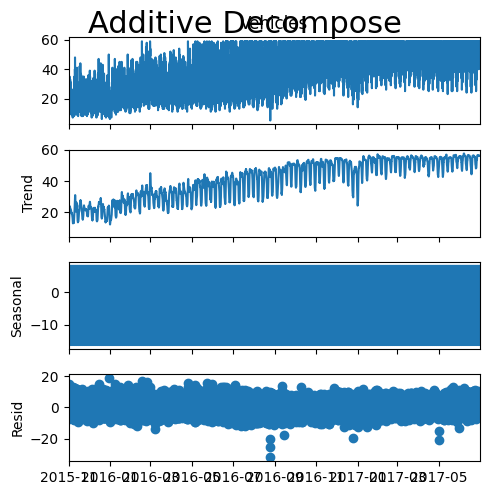

In [ ]:
#Seasonal decompose for junction 1

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_junction_1['Vehicles'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_junction_1['Vehicles'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Seasonal decompose for junction 2

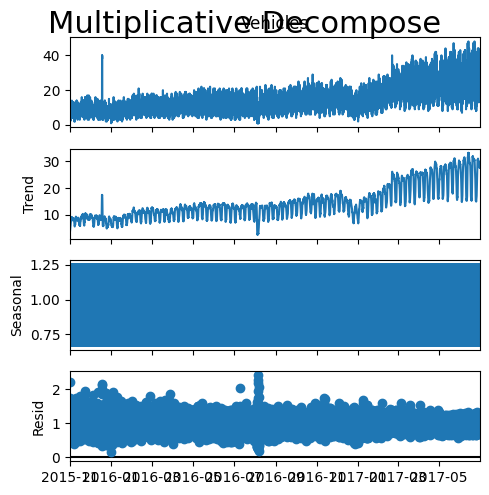

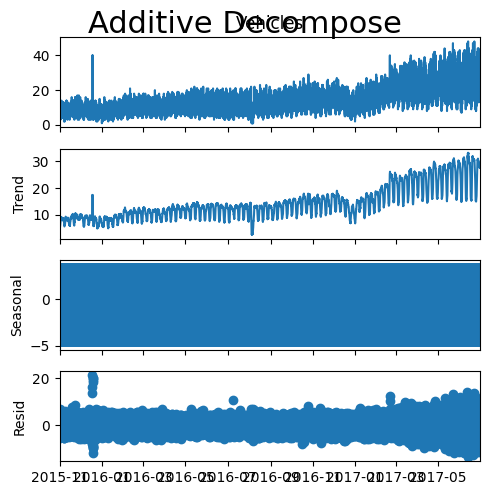

In [ ]:
#Seasonal decompose for junction 2

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_junction_2['Vehicles'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_junction_2['Vehicles'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#Seasonal decompose for junction 3

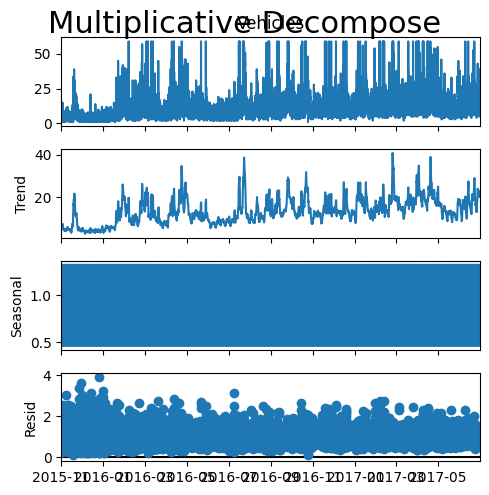

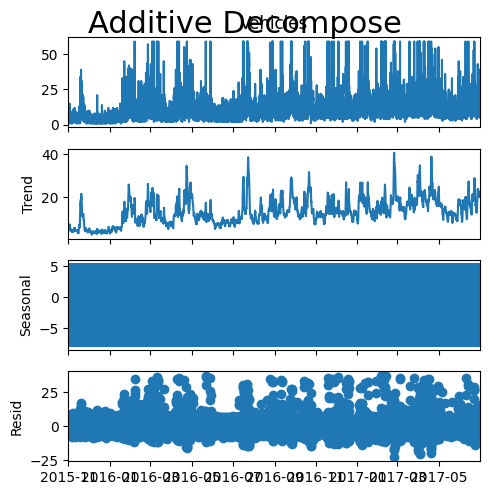

In [ ]:
#Seasonal decompose for junction 3

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_junction_3['Vehicles'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_junction_3['Vehicles'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#Seasonal decompose for junction 4

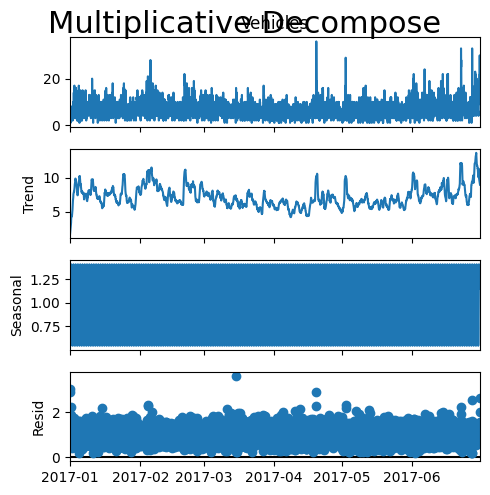

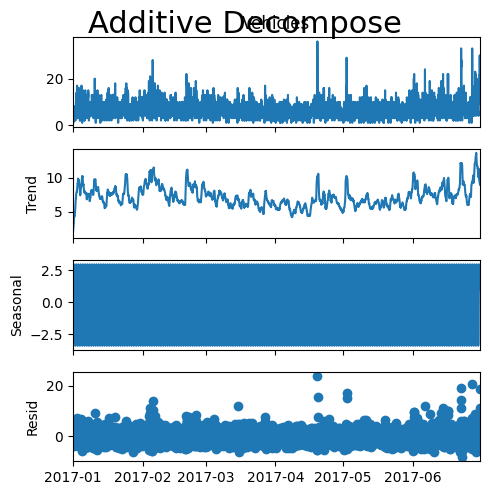

In [ ]:
#Seasonal decompose for junction 4

# Multiplicative Decomposition
result_mul = seasonal_decompose(df_junction_4['Vehicles'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df_junction_4['Vehicles'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (5,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#Check whether series is Sationary or not using Augmented Dickey-Fuller Test

In [ ]:
#Check whether series is Sationary or not using Augmented Dickey-Fuller Test
#Ho (Null Hypothesis): The time series data is non-stationary
#H1 (alternate Hypothesis): The time series data is stationary

from statsmodels.tsa.stattools import adfuller
#For Junction 1
res = adfuller(df_junction_1['Vehicles'])
print('For Junction 1: ')
print(res)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
#For Junction 2
res = adfuller(df_junction_2['Vehicles'])
print('For Junction 2: ')
print(res)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
#For Junction 3
res = adfuller(df_junction_3['Vehicles'])
print('For Junction 3: ')
print(res)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])
#For Junction 4
res = adfuller(df_junction_4['Vehicles'])
print('For Junction 4: ')
print(res)
print('ADF Statistic: %f' % res[0])
print('p-value: %f' % res[1])

For Junction 1: 
(-6.6596720663203515, 4.883042178113707e-09, 42, 14549, {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}, 75385.25477867841)
ADF Statistic: -6.659672
p-value: 0.000000
For Junction 2: 
(-8.04107727559774, 1.846368366770274e-12, 42, 14549, {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}, 67639.25742620083)
ADF Statistic: -8.041077
p-value: 0.000000
For Junction 3: 
(-7.563999442870052, 2.958687093572478e-11, 42, 14549, {'1%': -3.4307995466445482, '5%': -2.8617386797172126, '10%': -2.566875752496508}, 82965.5601694031)
ADF Statistic: -7.563999
p-value: 0.000000
For Junction 4: 
(-6.726732196265542, 3.3748745834489785e-09, 30, 4313, {'1%': -3.431867086998538, '5%': -2.862210364905111, '10%': -2.567126840085047}, 20176.990189819957)
ADF Statistic: -6.726732
p-value: 0.000000


**P-VALUE < 0.05 SO DATA FOR ALL JUNCTIONS ARE STATIONERY**

# Time series split

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3)

#Model for Junction 1

In [ ]:
print(df_junction_1['Vehicles'])

DateTime
2015-11-01 00:00:00    15
2015-11-01 01:00:00    13
2015-11-01 02:00:00    10
2015-11-01 03:00:00     7
2015-11-01 04:00:00     9
                       ..
2017-06-30 19:00:00    59
2017-06-30 20:00:00    59
2017-06-30 21:00:00    59
2017-06-30 22:00:00    59
2017-06-30 23:00:00    59
Freq: H, Name: Vehicles, Length: 14592, dtype: int64


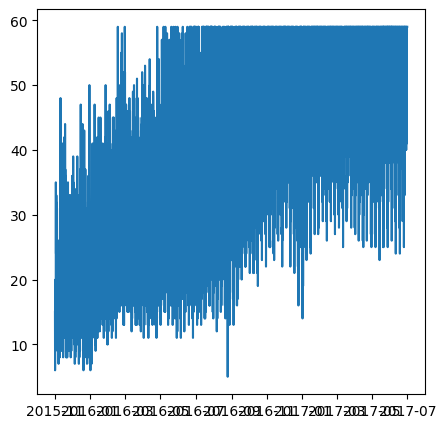

In [ ]:
# Line plot to see the distribution of the data
plt.plot(df_junction_1['Vehicles'])

In [ ]:
#Train and Test Split
#time-series class (tss) class returns two arrays to mark train and test sets
for train_index, test_index in tss.split(df_junction_1['Vehicles']):
    X_train_1, X_test_1 = df_junction_1['Vehicles'].iloc[train_index], df_junction_1['Vehicles'].iloc[test_index]



In [ ]:
X_train_1.shape,X_test_1.shape

((10944,), (3648,))

In [ ]:
#Apply auto_arima to find best order
model = pm.auto_arima(X_train_1, seasonal=False, m=12,trace = True) #Note for SRIMA seasonal=True

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62000.245, Time=32.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=64149.592, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63595.411, Time=0.99 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63733.966, Time=4.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=64147.600, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63316.325, Time=5.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=63338.086, Time=9.88 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=61996.477, Time=42.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=63337.680, Time=8.43 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=57.07 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=60.87 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=61612.466, Time=45.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=47.07 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=61573.496, Time=58.85 sec
 ARIMA(1,1,4)(0,0,0)[0] interc

In [ ]:
# create a model for junction 1
ar1 = pm.arima.ARIMA((2,1,4))
ar1.fit(X_train_1)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(2, 1, 4))

In [ ]:
pred1 = ar1.predict(X_test_1.shape[0])

In [ ]:
from pmdarima.metrics import smape
smape(X_test_1,pred1)

14.535416847530097

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

# Calculate root mean squared error
rsme_ = rmse(X_test_1, pred1)
print("Root Mean Square Error: ", rsme_)

# Calculate mean squared error
mse_ = mean_squared_error(X_test_1, pred1)
print("Mean Square Error: ", mse_)

# Calculate r2 score
r2 = r2_score(X_test_1, pred1)
print("R2 score: ",r2)

Root Mean Square Error:  9.313912604953916
Mean Square Error:  86.74896801271946
R2 score:  -0.09743140947554196


# K fold Time Series Validation

In [ ]:
#Create a list to store mean square error for each split
mse_scores = []

#Apply Time Series fold validation
for train_index, test_index in tss.split(df_junction_1['Vehicles']):
  X_train_1, X_test_1 = df_junction_1['Vehicles'].iloc[train_index], df_junction_1['Vehicles'].iloc[test_index]

  #Model create
  m_ar1 = pm.arima.ARIMA((2,1,4))
  m_ar1.fit(X_train_1)

  #Make predictions
  m_pred1 = m_ar1.predict(X_test_1.shape[0])

  #Calculate root mean squared error
  rsme_ = rmse(X_test_1, pred1)
  print("Root Mean Square Error: ", rsme_)

  #Calculate mean squared error
  mse_ = mean_squared_error(X_test_1, m_pred1)
  mse_scores.append(mse_)
  print("Mean Square Error: ", mse_)

  #Calculate r2 score
  r2 = r2_score(X_test_1, m_pred1)
  print("R2 score: ",r2)

#Calculate average Mean Squared Error across all splits
average_mse = np.mean(mse_scores)
print('\n')
print(f'Average Mean Squared Error across all splits: {average_mse}')

Residual plot, Predictor vs actual plot, error distribution chart

In [ ]:
##Residual Plot

#Extract the residuals
residuals = ar1.resid

#Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals())
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Predictor vs Actual plot
plt.figure(figsize=(10,6))
plt.plot(X_train_1, label='Actual')
plt.plot(pred1, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
#Error distribution charts

#Extract the residuals
residuals = ar1.resid

# Histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals(), bins=20, density=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

#Overfit/Underfit

In [ ]:
train_predictions = ar1.predict(X_train_1.shape[0])
# For training set
plt.figure(figsize=(10, 6))
plt.plot(X_train_1, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Training Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# For testing set
plt.figure(figsize=(10, 6))
plt.plot(X_test_1, label='Actual (Test)')
plt.plot(pred1, label='Predicted (Test)')
plt.title('Testing Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Model for Junction 2

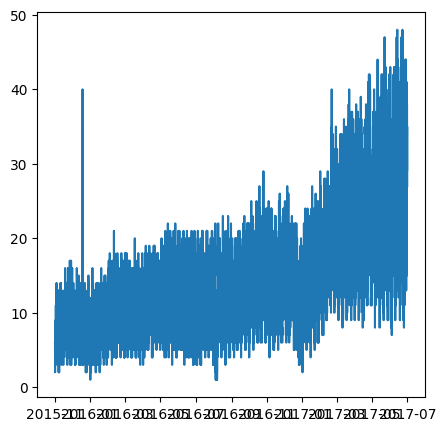

In [ ]:
# Line plot to see the distribution of the data
plt.plot(df_junction_2['Vehicles'])

In [ ]:
for train_index, test_index in tss.split(df_junction_2['Vehicles']):
    X_train_2, X_test_2 = df_junction_2['Vehicles'].iloc[train_index], df_junction_2['Vehicles'].iloc[test_index]

In [ ]:
model = pm.auto_arima(X_train_2, seasonal=False, m=12,trace = True) #Note for SRIMA seasonal=True

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=38.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=53005.965, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=51426.792, Time=1.30 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=51322.597, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=53003.965, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=51286.153, Time=5.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=51272.953, Time=7.29 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=51271.294, Time=2.16 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=51272.823, Time=3.30 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=51275.294, Time=4.88 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=51269.297, Time=1.30 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=51424.794, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=51270.826, Time=1.89 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=51270.955, Time=1.59 sec
 ARIMA(1,1,1)(0,0,0)[0] 

In [ ]:
# create a model for Junction 2
ar2 = pm.arima.ARIMA((2,1,0))
ar2.fit(X_train_2)

ARIMA(order=(2, 1, 0))

In [ ]:
pred2 = ar2.predict(X_test_2.shape[0])

In [ ]:
from pmdarima.metrics import smape
smape(X_test_2,pred2)

38.91509294337939

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rsme_ = rmse(X_test_2, pred2)
print("Root Mean Square Error: ", rsme_)

# Calculate mean squared error
mse_ = mean_squared_error(X_test_2, pred2)
print("Mean Square Error: ", mse_)

# Calculate r2 score
r2 = r2_score(X_test_2, pred2)
print("R2 score: ",r2)

Root Mean Square Error:  10.770065730033107
Mean Square Error:  115.99431582923356
R2 score:  -0.7922834144068596


K fold Time Series Validation

In [ ]:
#Create a list to store mean square error for each split
mse_scores = []

#Apply Time Series fold validation
for train_index, test_index in tss.split(df_junction_2['Vehicles']):
  X_train_2, X_test_2 = df_junction_2['Vehicles'].iloc[train_index], df_junction_2['Vehicles'].iloc[test_index]

  # Model create
  m_ar2 = pm.arima.ARIMA((2,1,0))
  m_ar2.fit(X_train_2)

  # Make predictions
  m_pred2 = m_ar2.predict(X_test_2.shape[0])

  # Calculate root mean squared error
  rsme_ = rmse(X_test_2, pred1)
  print("Root Mean Square Error: ", rsme_)

  # Calculate mean squared error
  mse_ = mean_squared_error(X_test_2, m_pred2)
  mse_scores.append(mse_)
  print("Mean Square Error: ", mse_)

  # Calculate r2 score
  r2 = r2_score(X_test_2, m_pred2)
  print("R2 score: ",r2)

# Calculate average Mean Squared Error across all splits
average_mse = np.mean(mse_scores)
print('\n')
print(f'Average Mean Squared Error across all splits: {average_mse}')

## Residual plot, Predictor vs actual plot, error distribution chart

In [ ]:
##Residual Plot

#Extract the residuals
residuals = ar2.resid

#Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals())
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Predictor vs Actual plot
plt.figure(figsize=(10,6))
plt.plot(X_train_2, label='Actual')
plt.plot(pred2, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
#Error distribution charts

#Extract the residuals
residuals = ar2.resid

# Histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals(), bins=20, density=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## Overfit/Underfit

In [ ]:
train_predictions = ar2.predict(X_train_2.shape[0])
# For training set
plt.figure(figsize=(10, 6))
plt.plot(X_train_2, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Training Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# For testing set
plt.figure(figsize=(10, 6))
plt.plot(X_test_2, label='Actual (Test)')
plt.plot(pred2, label='Predicted (Test)')
plt.title('Testing Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Model for Junction 3

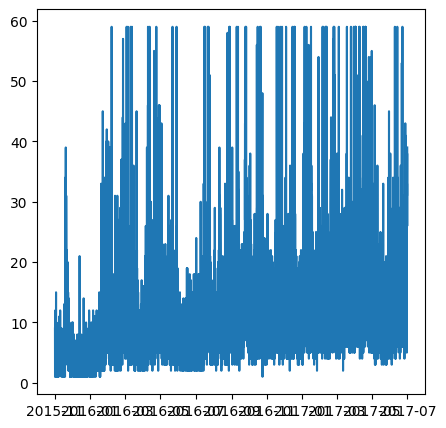

In [ ]:
# Line plot to see the distribution of the data
plt.plot(df_junction_3['Vehicles'])

In [ ]:
for train_index, test_index in tss.split(df_junction_3['Vehicles']):
    X_train_3, X_test_3 = df_junction_3['Vehicles'].iloc[train_index], df_junction_3['Vehicles'].iloc[test_index]


In [ ]:
model = pm.auto_arima(X_train_3, seasonal=False, m=12,trace = True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=62805.746, Time=39.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=63701.955, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=63653.258, Time=0.82 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=63653.000, Time=2.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=63699.955, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=63656.996, Time=6.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=62797.084, Time=27.54 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=63654.987, Time=7.38 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=63655.040, Time=2.00 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=62705.777, Time=31.89 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=63656.978, Time=2.01 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=62579.720, Time=35.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=63635.165, Time=3.71 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=62518.776, Time=33.72 sec
 ARIMA(5,1,0)(

In [ ]:
# create a model for Junction 3
ar3 = pm.arima.ARIMA((4,1,2))
ar3.fit(X_train_3)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(order=(4, 1, 2))

In [ ]:
X_test_3.head()

,Vehicles
DateTime,
2017-01-30 00:00:00,11
2017-01-30 01:00:00,15
2017-01-30 02:00:00,15
2017-01-30 03:00:00,16
2017-01-30 04:00:00,11


In [ ]:
pred3 = ar3.predict(X_test_3.shape[0])

In [ ]:
from pmdarima.metrics import smape
smape(X_test_3,pred3)

77.99534948731743

In [ ]:
# Calculate root mean squared error
rsme_ = rmse(X_test_3, pred3)
print("Root Mean Square Error: ", rsme_)

# Calculate mean squared error
mse_ = mean_squared_error(X_test_3, pred3)
print("Mean Square Error: ", mse_)

# Calculate r2 score
r2 = r2_score(X_test_3, pred3)
print("R2 score: ",r2)

Root Mean Square Error:  26.298241780360907
Mean Square Error:  691.5975207383201
R2 score:  -5.995906768180677


#K fold Time Series Validation


In [ ]:
#Create a list to store mean square error for each split
mse_scores = []

#Apply Time Series fold validation
for train_index, test_index in tss.split(df_junction_3['Vehicles']):
  X_train_3, X_test_3 = df_junction_3['Vehicles'].iloc[train_index], df_junction_3['Vehicles'].iloc[test_index]

  # Model create
  m_ar3 = pm.arima.ARIMA((4,1,2))
  m_ar3.fit(X_train_3)

  # Make predictions
  m_pred3 = m_ar3.predict(X_test_3.shape[0])

  # Calculate root mean squared error
  rsme_ = rmse(X_test_3, pred3)
  print("Root Mean Square Error: ", rsme_)

  # Calculate mean squared error
  mse_ = mean_squared_error(X_test_3, m_pred3)
  mse_scores.append(mse_)
  print("Mean Square Error: ", mse_)

  # Calculate r2 score
  r2 = r2_score(X_test_3, m_pred3)
  print("R2 score: ",r2)

# Calculate average Mean Squared Error across all splits
average_mse = np.mean(mse_scores)
print('\n')
print(f'Average Mean Squared Error across all splits: {average_mse}')

## Residual plot, Predictor vs actual plot, error distribution chart

In [ ]:
##Residual Plot

#Extract the residuals
residuals = ar3.resid

#Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals())
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Predictor vs Actual plot
plt.figure(figsize=(10,6))
plt.plot(X_train_3, label='Actual')
plt.plot(pred3, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
#Error distribution charts

#Extract the residuals
residuals = ar3.resid

# Histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals(), bins=20, density=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## Overfit v/s Underfit

In [ ]:
train_predictions = ar3.predict(X_train_3.shape[0])
# For training set
plt.figure(figsize=(10, 6))
plt.plot(X_train_3, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Training Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# For testing set
plt.figure(figsize=(10, 6))
plt.plot(X_test_3, label='Actual (Test)')
plt.plot(pred3, label='Predicted (Test)')
plt.title('Testing Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Model for Junction 4

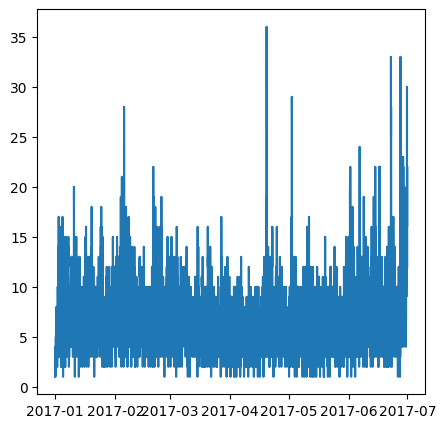

In [ ]:
# Line plot to see the distribution of the data
plt.plot(df_junction_4['Vehicles'])

In [ ]:
for train_index, test_index in tss.split(df_junction_4['Vehicles']):
    X_train_4, X_test_4 = df_junction_4['Vehicles'].iloc[train_index], df_junction_4['Vehicles'].iloc[test_index]

In [ ]:
model = pm.auto_arima(X_train_4, seasonal=False, m=12,trace = True)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16177.091, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15731.535, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15617.123, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16175.092, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15617.076, Time=0.91 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=15619.410, Time=1.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=15617.259, Time=0.82 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=15635.265, Time=0.55 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=15615.082, Time=0.40 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=15615.128, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=15729.538, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=1.49 sec
 ARIMA(1,1,2)(0,0,0)[0]             

In [ ]:
X_train_4.head()

,Vehicles
DateTime,
2017-01-01 00:00:00,3
2017-01-01 01:00:00,1
2017-01-01 02:00:00,4
2017-01-01 03:00:00,4
2017-01-01 04:00:00,2


In [ ]:
# create a model for Junction 4
ar4 = pm.arima.ARIMA((1,1,1))
ar4.fit(X_train_4)

ARIMA(order=(1, 1, 1))

In [ ]:
X_test_4.head()

,Vehicles
DateTime,
2017-05-16 18:00:00,6
2017-05-16 19:00:00,8
2017-05-16 20:00:00,9
2017-05-16 21:00:00,5
2017-05-16 22:00:00,6


In [ ]:
pred4 = ar4.predict(X_test_4.shape[0])

In [ ]:
from pmdarima.metrics import smape
smape(X_test_4,pred4)

45.270936259524696

In [ ]:
# Calculate root mean squared error
rsme_ = rmse(X_test_4, pred4)
print("Root Mean Square Error: ", rsme_)

# Calculate mean squared error
mse_ = mean_squared_error(X_test_4, pred4)
print("Mean Square Error: ", mse_)

# Calculate r2 score
r2 = r2_score(X_test_4, pred4)
print("R2 score: ",r2)

Root Mean Square Error:  4.445092676436806
Mean Square Error:  19.758848902112124
R2 score:  -0.2039296217251807


## K fold Time Series Validation

In [ ]:
#Create a list to store mean square error for each split
mse_scores = []

#Apply Time Series fold validation
for train_index, test_index in tss.split(df_junction_4['Vehicles']):
  X_train_4, X_test_4 = df_junction_4['Vehicles'].iloc[train_index], df_junction_4['Vehicles'].iloc[test_index]

  # Model create
  m_ar4 = pm.arima.ARIMA((1,1,1))
  m_ar4.fit(X_train_4)

  # Make predictions
  m_pred4 = m_ar4.predict(X_test_4.shape[0])

  # Calculate root mean squared error
  rsme_ = rmse(X_test_4, pred4)
  print("Root Mean Square Error: ", rsme_)

  # Calculate mean squared error
  mse_ = mean_squared_error(X_test_4, m_pred4)
  mse_scores.append(mse_)
  print("Mean Square Error: ", mse_)

  # Calculate r2 score
  r2 = r2_score(X_test_4, m_pred4)
  print("R2 score: ",r2)

# Calculate average Mean Squared Error across all splits
average_mse = np.mean(mse_scores)
print('\n')
print(f'Average Mean Squared Error across all splits: {average_mse}')

#Residual plot, Predictor vs actual plot, error distribution chart




In [ ]:
##Residual Plot

#Extract the residuals
residuals = ar4.resid

#Plot the residuals
plt.figure(figsize=(10,6))
plt.plot(residuals())
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#Predictor vs Actual plot
plt.figure(figsize=(10,6))
plt.plot(X_train_4, label='Actual')
plt.plot(pred4, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [ ]:
#Error distribution charts

#Extract the residuals
residuals = ar4.resid

# Histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals(), bins=20, density=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

## Overfit or Underfit

In [ ]:
train_predictions = ar4.predict(X_train_4.shape[0])
# For training set
plt.figure(figsize=(10, 6))
plt.plot(X_train_1, label='Actual (Train)')
plt.plot(train_predictions, label='Predicted (Train)')
plt.title('Training Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# For testing set
plt.figure(figsize=(10, 6))
plt.plot(X_test_1, label='Actual (Test)')
plt.plot(pred1, label='Predicted (Test)')
plt.title('Testing Set: Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# XGBoost and CatBoost

In [ ]:
df = pd.read_csv('/content/Integrated_Dataset.csv')

In [ ]:
df.head()

,DateTime,ID,Humidity,Temperature(C),Wind Speed(Kmph),Vehicles,Junction,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),...,holiday_Rath Yatra (R),holiday_Republic Day (G),holiday_Shivaji Jayanti (R),holiday_Swami Dayananda Saraswati Jayanti (R),holiday_Vaisakhadi(Bengal)/Bahag Bihu (Assam) (R),holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted
0,11-01-15 0:00,20151101001,-0.949876,-1.958923,-0.285424,-0.379796,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,11-01-15 0:00,20151101002,-0.949876,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,11-01-15 0:00,20151101003,-0.949876,-1.958923,-0.285424,-0.739817,3,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11-01-15 1:00,20151101011,-0.910365,-1.958923,-0.285424,-0.499803,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11-01-15 1:00,20151101012,-0.910365,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Convert DateTime from object type to datetime64[ns] type
df = df.astype({"DateTime":'datetime64[ns]'})

#Create feature 'Hour_of_day' and 'Day_Of_Week' from DateTime for each junction
df['Hour_of_day'] = df['DateTime'].dt.hour
df['Day_Of_Week'] = df['DateTime'].dt.dayofweek
df['Day_Of_Month'] = df['DateTime'].dt.day
df['Month'] = df['DateTime'].dt.month
df['Year'] = df['DateTime'].dt.year


<ipython-input-83-a81618135cb1>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df.astype({"DateTime":'datetime64[ns]'})


In [ ]:
df.head()

,DateTime,ID,Humidity,Temperature(C),Wind Speed(Kmph),Vehicles,Junction,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),...,holiday_Vaisakhadi(Bengal)/Bahag Bihu (Assam) (R),holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted,Hour_of_day,Day_Of_Week,Day_Of_Month,Month
0,2015-11-01 00:00:00,20151101001,-0.949876,-1.958923,-0.285424,-0.379796,1,False,False,False,...,False,False,False,False,True,False,0,6,1,11
1,2015-11-01 00:00:00,20151101002,-0.949876,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,True,False,0,6,1,11
2,2015-11-01 00:00:00,20151101003,-0.949876,-1.958923,-0.285424,-0.739817,3,False,False,False,...,False,False,False,False,True,False,0,6,1,11
3,2015-11-01 01:00:00,20151101011,-0.910365,-1.958923,-0.285424,-0.499803,1,False,False,False,...,False,False,False,False,True,False,1,6,1,11
4,2015-11-01 01:00:00,20151101012,-0.910365,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,True,False,1,6,1,11


In [ ]:
#Make DateTime as index rows
df.set_index('DateTime',inplace=True)

In [ ]:
df.head()

,ID,Humidity,Temperature(C),Wind Speed(Kmph),Vehicles,Junction,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),holiday_Chaitra Sukladi/Gudi Padava/Ugadi/Cheti Chand (R),...,holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted,Hour_of_day,Day_Of_Week,Day_Of_Month,Month,Year
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-11-01 00:00:00,20151101001,-0.949876,-1.958923,-0.285424,-0.379796,1,False,False,False,False,...,False,False,False,True,False,0,6,1,11,2015
2015-11-01 00:00:00,20151101002,-0.949876,-1.958923,-0.285424,-0.919827,2,False,False,False,False,...,False,False,False,True,False,0,6,1,11,2015
2015-11-01 00:00:00,20151101003,-0.949876,-1.958923,-0.285424,-0.739817,3,False,False,False,False,...,False,False,False,True,False,0,6,1,11,2015
2015-11-01 01:00:00,20151101011,-0.910365,-1.958923,-0.285424,-0.499803,1,False,False,False,False,...,False,False,False,True,False,1,6,1,11,2015
2015-11-01 01:00:00,20151101012,-0.910365,-1.958923,-0.285424,-0.919827,2,False,False,False,False,...,False,False,False,True,False,1,6,1,11,2015


In [ ]:
#Sort indices
df.sort_index(inplace=True)

In [ ]:
df.head()

,ID,Humidity,Temperature(C),Wind Speed(Kmph),Vehicles,Junction,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),holiday_Chaitra Sukladi/Gudi Padava/Ugadi/Cheti Chand (R),...,holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted,Hour_of_day,Day_Of_Week,Day_Of_Month,Month,Year
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-11-01 00:00:00,20151101001,-0.949876,-1.958923,-0.285424,-0.379796,1,False,False,False,False,...,False,False,False,True,False,0,6,1,11,2015
2015-11-01 00:00:00,20151101002,-0.949876,-1.958923,-0.285424,-0.919827,2,False,False,False,False,...,False,False,False,True,False,0,6,1,11,2015
2015-11-01 00:00:00,20151101003,-0.949876,-1.958923,-0.285424,-0.739817,3,False,False,False,False,...,False,False,False,True,False,0,6,1,11,2015
2015-11-01 01:00:00,20151101011,-0.910365,-1.958923,-0.285424,-0.499803,1,False,False,False,False,...,False,False,False,True,False,1,6,1,11,2015
2015-11-01 01:00:00,20151101012,-0.910365,-1.958923,-0.285424,-0.919827,2,False,False,False,False,...,False,False,False,True,False,1,6,1,11,2015


In [ ]:
#Split of data
X=df.drop(['Vehicles','ID'], axis=1)
Y=df['Vehicles']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss_1 = TimeSeriesSplit(n_splits=3)   #30% test

In [ ]:
for train_index, test_index in tss_1.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [ ]:
X_train.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36090 entries, 2015-11-01 00:00:00 to 2017-02-25 16:00:00
Data columns (total 60 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Humidity                                                                36090 non-null  float64
 1   Temperature(C)                                                          36090 non-null  float64
 2   Wind Speed(Kmph)                                                        36090 non-null  float64
 3   Junction                                                                36090 non-null  int64  
 4   holiday_Basant Panchami / Sri Panchami (R)                              36090 non-null  bool   
 5   holiday_Bhai Duj (R)                                                    36090 non-null  bool   
 6   holiday_Buddha Purnima (G)                 

(None, None)

# #Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor=DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=0, splitter='best')

In [ ]:
rfe = RFE(regressor,n_features_to_select =12,step=2) #11 feature selection with 2=k-fold cross validation

In [ ]:
rfe.fit(X_train,Y_train)

RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=12,
    step=2)

In [ ]:
rfe.ranking_

array([ 1,  1,  1,  1, 17,  3, 24, 14,  3, 10, 24, 22,  8, 22, 21, 16,  6,
       25, 11,  5,  4, 20, 12, 16, 13, 14, 23,  5, 19, 20, 13, 11,  9,  6,
       25,  8, 18, 23,  1,  2,  7, 17, 15, 21,  7, 19,  9,  4, 12, 18, 10,
       15,  1,  1,  2,  1,  1,  1,  1,  1])

In [ ]:
feature_tuple = tuple(zip(X_train.columns,rfe.ranking_))


In [ ]:
sorted(feature_tuple, key = lambda x : x[1])

[('Humidity', 1),
 ('Temperature(C)', 1),
 ('Wind Speed(Kmph)', 1),
 ('Junction', 1),
 ("holiday_New Year's Day (R)", 1),
 ('holiday_type_Gazetted', 1),
 ('holiday_type_No Holiday', 1),
 ('Hour_of_day', 1),
 ('Day_Of_Week', 1),
 ('Day_Of_Month', 1),
 ('Month', 1),
 ('Year', 1),
 ('holiday_No Special Event', 2),
 ('holiday_type_Restricted', 2),
 ('holiday_Bhai Duj (R)', 3),
 ('holiday_Christmas Day (G)', 3),
 ("holiday_Guru Rabindranath's Birthday (R)", 4),
 ('holiday_Shivaji Jayanti (R)', 4),
 ("holiday_Gur'u Nanak's Birthday (G)", 5),
 ('holiday_Independence day (G)', 5),
 ('holiday_Easter Sunday (R)', 6),
 ("holiday_Mahatma Gandhi's Birthday (G)", 6),
 ('holiday_Onam or Thiru Onam Day (R)', 7),
 ('holiday_Ram Navami (R)', 7),
 ('holiday_Dussehra (G)', 8),
 ('holiday_Makar Sankranti (R)', 8),
 ("holiday_Maharishi Valmiki's Birthday (R)", 9),
 ('holiday_Republic Day (G)', 9),
 ('holiday_Christmas Eve (R)', 10),
 ('holiday_Vaisakhi/Vishu/Mesadi (R)', 10),
 ('holiday_Govardhan Puja (R)',

In [ ]:
X_train = X_train.loc[:,
['Humidity','Temperature(C)','Wind Speed(Kmph)','Junction','holiday_No Special Event',
 'holiday_type_Gazetted','holiday_type_No Holiday','holiday_type_Restricted','Hour_of_day','Day_Of_Week','Day_Of_Month','Month','Year']]

In [ ]:
X_test = X_test.loc[:,
['Humidity','Temperature(C)','Wind Speed(Kmph)','Junction','holiday_No Special Event',
 'holiday_type_Gazetted','holiday_type_No Holiday','holiday_type_Restricted','Hour_of_day','Day_Of_Week','Day_Of_Month','Month','Year']]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [10,20,30,40,50],
    'learning_rate': [0.02,0.05,0.08,0.1,0.12],
    'max_depth': [3,4,5,6,7],
}

In [ ]:
xgb_model = xgb.XGBRegressor()

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=2,return_train_score=True)

In [ ]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=10; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=20; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n_estimators=30; total time=   0.1s
[CV] END ...learning_rate=0.02, max_depth=3, n

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.08, 0.1, 0.12],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [10, 20, 30, 40, 50]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [ ]:
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_xgb_model = grid_search.best_estimator_

In [ ]:
print("Best Parameters:", best_params)
print("Best model:", best_xgb_model)


Best Parameters: {'learning_rate': 0.12, 'max_depth': 5, 'n_estimators': 20}
Best model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


Traning XGBOOST with best parameter

In [ ]:
xgc=best_xgb_model

In [ ]:
xgc.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.12, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
Y_pred = xgc.predict(X_test)

In [ ]:
#Root Mean Square Error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
print("RMSE:", rmse)

RMSE: 0.4295610689498854


In [ ]:
r2 = r2_score(Y_test, Y_pred)
print("R-squared:", r2)

R-squared: 0.8544211571343058


In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.3287733763482606


**1. Residual Plot**

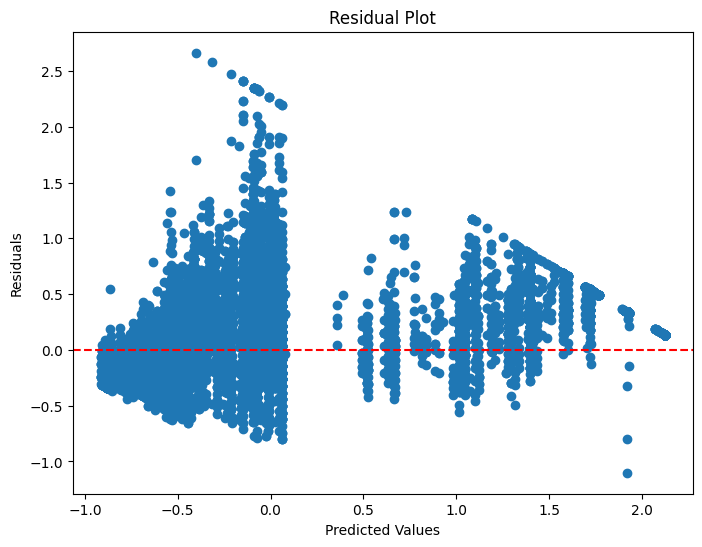

In [ ]:
import matplotlib.pyplot as plt
# Calculate residuals
residuals = Y_test - Y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

graph is Funnel Shape so their is Heteroscedasticity in
residuals.
Which indicates that the model's errors are not consistent across the range of predictions.
XGBoost, like many tree-based models, is generally robust to heteroscedasticity

2)Prediction vs Actual:

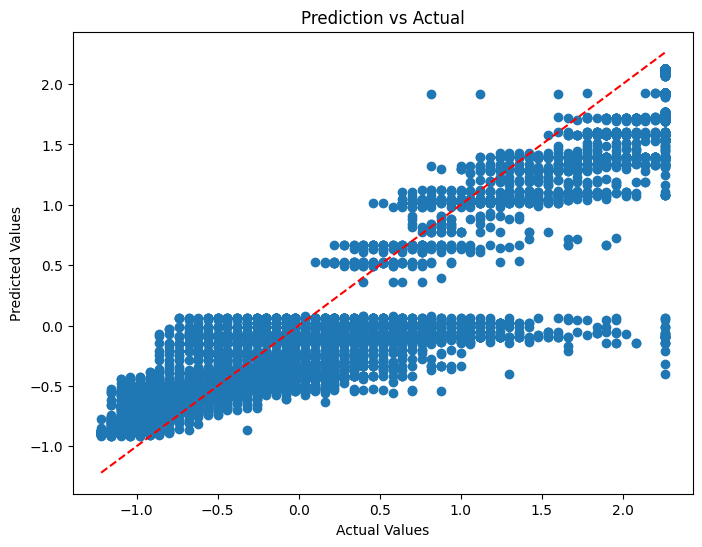

In [ ]:


# Assuming 'Y_test' and 'Y_pred' are your true and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
# Plot a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.show()

almost 70% points clustered tightly around the diagonal line, indicating that the predictions are very close to the actual values with minimal deviations.

**3. Error Distribution:**

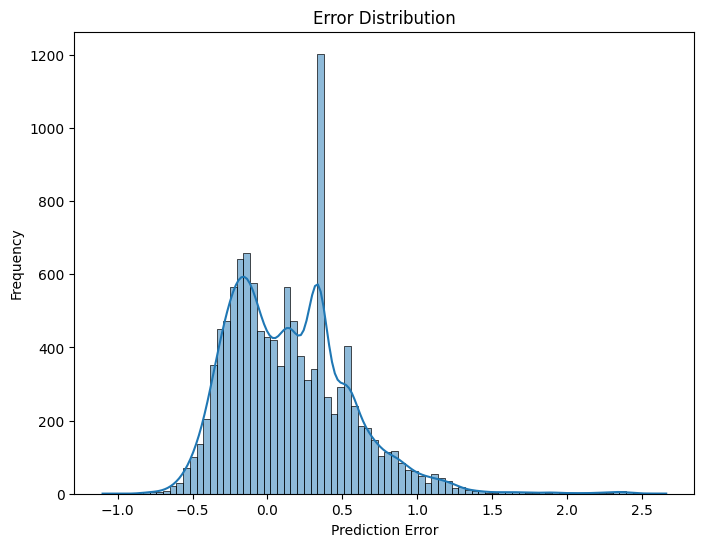

In [ ]:
import seaborn as sns

# Calculate residuals
residuals = Y_test - Y_pred

# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

distribution centered around zero with a relatively small spread, indicating that model's errors are small and unbiased.

**4)training and validation scores**

In [ ]:
train_scores = -grid_search.cv_results_['mean_train_score']
val_scores = -grid_search.cv_results_['mean_test_score']

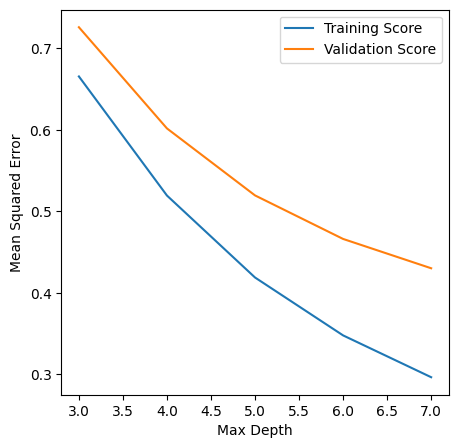

In [ ]:
plt.plot(param_grid['max_depth'], train_scores[:5], label='Training Score')
plt.plot(param_grid['max_depth'], val_scores[:5], label='Validation Score')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Here both training and validation scores are decreasing with increase in depth. means optimum fit.
(Overfitting: If the training score consistently decreases.while the validation score plateaus or increases with increasing complexity.)

## **LSTM model**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN,Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
#df_lstm = pd.read_csv('/content/Integrated_Dataset_Component_4.csv')
df_lstm = pd.read_csv('/content/Integrated_Dataset.csv')

In [ ]:
df_lstm.head()

,DateTime,ID,Humidity,Temperature(C),Wind Speed(Kmph),Vehicles,Junction,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),...,holiday_Rath Yatra (R),holiday_Republic Day (G),holiday_Shivaji Jayanti (R),holiday_Swami Dayananda Saraswati Jayanti (R),holiday_Vaisakhadi(Bengal)/Bahag Bihu (Assam) (R),holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted
0,11-01-15 0:00,20151101001,-0.949876,-1.958923,-0.285424,-0.379796,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,11-01-15 0:00,20151101002,-0.949876,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,11-01-15 0:00,20151101003,-0.949876,-1.958923,-0.285424,-0.739817,3,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,11-01-15 1:00,20151101011,-0.910365,-1.958923,-0.285424,-0.499803,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11-01-15 1:00,20151101012,-0.910365,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
#Check dtype of DateTime
df_lstm['DateTime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48120 entries, 0 to 48119
Series name: DateTime
Non-Null Count  Dtype 
--------------  ----- 
48120 non-null  object
dtypes: object(1)
memory usage: 376.1+ KB


In [ ]:
#Convert DateTime into datetime64[ns]
df_lstm = df_lstm.astype({"DateTime" : 'datetime64[ns]'})

<ipython-input-143-73c88c8045cb>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_lstm = df_lstm.astype({"DateTime" : 'datetime64[ns]'})


In [ ]:
#Check dtype of DateTime
df_lstm['DateTime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48120 entries, 0 to 48119
Series name: DateTime
Non-Null Count  Dtype         
--------------  -----         
48120 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 376.1 KB


In [ ]:
#Create feature hour_of_day and week_of_day from DateTime
df_lstm['hour_of_day'] = df_lstm['DateTime'].dt.hour
df_lstm['day_of_week'] = df_lstm['DateTime'].dt.dayofweek

In [ ]:
df_lstm.head()

,DateTime,ID,Humidity,Temperature(C),Wind Speed(Kmph),Vehicles,Junction,holiday_Basant Panchami / Sri Panchami (R),holiday_Bhai Duj (R),holiday_Buddha Purnima (G),...,holiday_Shivaji Jayanti (R),holiday_Swami Dayananda Saraswati Jayanti (R),holiday_Vaisakhadi(Bengal)/Bahag Bihu (Assam) (R),holiday_Vaisakhi/Vishu/Mesadi (R),holiday_Vinayaka Chaturthi/Ganesh Chaturthi (R),holiday_type_Gazetted,holiday_type_No Holiday,holiday_type_Restricted,hour_of_day,day_of_week
0,2015-11-01 00:00:00,20151101001,-0.949876,-1.958923,-0.285424,-0.379796,1,False,False,False,...,False,False,False,False,False,False,True,False,0,6
1,2015-11-01 00:00:00,20151101002,-0.949876,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,False,False,True,False,0,6
2,2015-11-01 00:00:00,20151101003,-0.949876,-1.958923,-0.285424,-0.739817,3,False,False,False,...,False,False,False,False,False,False,True,False,0,6
3,2015-11-01 01:00:00,20151101011,-0.910365,-1.958923,-0.285424,-0.499803,1,False,False,False,...,False,False,False,False,False,False,True,False,1,6
4,2015-11-01 01:00:00,20151101012,-0.910365,-1.958923,-0.285424,-0.919827,2,False,False,False,...,False,False,False,False,False,False,True,False,1,6


In [ ]:
#Select important feature
df_lstm = df_lstm.loc[:,['DateTime','Junction', 'Vehicles']]
df_lstm.columns

Index(['DateTime', 'Junction', 'Vehicles'], dtype='object')

In [ ]:
#Make DateTime as index rows
df_lstm.set_index('DateTime',inplace=True)
#Sort indices
df_lstm.sort_index(inplace=True)


In [ ]:
#Create 4 dataframe for each junction
df_lstm_Junction_1 = df_lstm[df_lstm['Junction'] == 1]
df_lstm_Junction_2 = df_lstm[df_lstm['Junction'] == 2]
df_lstm_Junction_3 = df_lstm[df_lstm['Junction'] == 3]
df_lstm_Junction_4 = df_lstm[df_lstm['Junction'] == 4]

In [ ]:
#Create 12 lag for junction 1,2,3,4
for i in range(1,25,1):
    df_lstm_Junction_1[f'lag{i}'] = df_lstm_Junction_1['Vehicles'].shift(i)
for i in range(1,25,1):
    df_lstm_Junction_2[f'lag{i}'] = df_lstm_Junction_2['Vehicles'].shift(i)
for i in range(1,25,1):
    df_lstm_Junction_3[f'lag{i}'] = df_lstm_Junction_3['Vehicles'].shift(i)
for i in range(1,25,1):
    df_lstm_Junction_4[f'lag{i}'] = df_lstm_Junction_4['Vehicles'].shift(i)

<ipython-input-204-3d922527c9d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lstm_Junction_1[f'lag{i}'] = df_lstm_Junction_1['Vehicles'].shift(i)
<ipython-input-204-3d922527c9d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lstm_Junction_1[f'lag{i}'] = df_lstm_Junction_1['Vehicles'].shift(i)
<ipython-input-204-3d922527c9d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
#Drop NaN
df_lstm_Junction_1.dropna(inplace=True)
df_lstm_Junction_2.dropna(inplace=True)
df_lstm_Junction_3.dropna(inplace=True)
df_lstm_Junction_4.dropna(inplace=True)

<ipython-input-205-0f18f4b1f2e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lstm_Junction_1.dropna(inplace=True)
<ipython-input-205-0f18f4b1f2e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lstm_Junction_2.dropna(inplace=True)
<ipython-input-205-0f18f4b1f2e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lstm_Junction_3.dropna(inplace=True)
<ipython-input-205-0f18f4b1f2e7>:5: SettingWithCopyWarning: 
A value is t

LSTM for Junction 1

In [ ]:
df_lstm_Junction_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14568 entries, 2015-11-02 00:00:00 to 2017-06-30 23:00:00
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Junction  14568 non-null  int64  
 1   Vehicles  14568 non-null  float64
 2   lag1      14568 non-null  float64
 3   lag2      14568 non-null  float64
 4   lag3      14568 non-null  float64
 5   lag4      14568 non-null  float64
 6   lag5      14568 non-null  float64
 7   lag6      14568 non-null  float64
 8   lag7      14568 non-null  float64
 9   lag8      14568 non-null  float64
 10  lag9      14568 non-null  float64
 11  lag10     14568 non-null  float64
 12  lag11     14568 non-null  float64
 13  lag12     14568 non-null  float64
 14  lag13     14568 non-null  float64
 15  lag14     14568 non-null  float64
 16  lag15     14568 non-null  float64
 17  lag16     14568 non-null  float64
 18  lag17     14568 non-null  float64
 19  lag18     14568 non-null  float6

In [ ]:
#Split X and Y
X = df_lstm_Junction_1.drop(['Junction','Vehicles'],axis=1)
Y = df_lstm_Junction_1['Vehicles']

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss_1 = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tss_1.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [ ]:
X_train.values[:3]

array([[-0.3797962 , -0.07977891, -0.13978237, -0.25978928, -0.07977891,
        -0.25978928, -0.31979274, -0.55980657, -0.55980657, -0.31979274,
        -0.3797962 , -0.31979274, -0.25978928, -0.3797962 , -0.55980657,
        -0.61981003, -0.7998204 , -0.73981694, -0.91982732, -0.73981694,
        -0.85982386, -0.67981349, -0.49980311, -0.3797962 ],
       [-0.43979966, -0.3797962 , -0.07977891, -0.13978237, -0.25978928,
        -0.07977891, -0.25978928, -0.31979274, -0.55980657, -0.55980657,
        -0.31979274, -0.3797962 , -0.31979274, -0.25978928, -0.3797962 ,
        -0.55980657, -0.61981003, -0.7998204 , -0.73981694, -0.91982732,
        -0.73981694, -0.85982386, -0.67981349, -0.49980311],
       [-0.55980657, -0.43979966, -0.3797962 , -0.07977891, -0.13978237,
        -0.25978928, -0.07977891, -0.25978928, -0.31979274, -0.55980657,
        -0.55980657, -0.31979274, -0.3797962 , -0.31979274, -0.25978928,
        -0.3797962 , -0.55980657, -0.61981003, -0.7998204 , -0.73981694,
  

In [ ]:
import numpy as np
X_train_rnn = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))
X_train_rnn.shape, X_test_rnn.shape

((10926, 24, 1), (3642, 24, 1))

In [ ]:
X_train_rnn[:3]

array([[[-0.3797962 ],
        [-0.07977891],
        [-0.13978237],
        [-0.25978928],
        [-0.07977891],
        [-0.25978928],
        [-0.31979274],
        [-0.55980657],
        [-0.55980657],
        [-0.31979274],
        [-0.3797962 ],
        [-0.31979274],
        [-0.25978928],
        [-0.3797962 ],
        [-0.55980657],
        [-0.61981003],
        [-0.7998204 ],
        [-0.73981694],
        [-0.91982732],
        [-0.73981694],
        [-0.85982386],
        [-0.67981349],
        [-0.49980311],
        [-0.3797962 ]],

       [[-0.43979966],
        [-0.3797962 ],
        [-0.07977891],
        [-0.13978237],
        [-0.25978928],
        [-0.07977891],
        [-0.25978928],
        [-0.31979274],
        [-0.55980657],
        [-0.55980657],
        [-0.31979274],
        [-0.3797962 ],
        [-0.31979274],
        [-0.25978928],
        [-0.3797962 ],
        [-0.55980657],
        [-0.61981003],
        [-0.7998204 ],
        [-0.73981694],
        [

In [ ]:
# Define the model
model1 = Sequential()
model1.add(LSTM(2, activation='relu',return_sequences=True, input_shape=(12,1)))
# First LSTM layer with 4 units, ReLU activation, and returning sequences for the next layer
model1.add(LSTM(1, activation='relu'))
# Second LSTM layer with 2 units and ReLU activation, no need to return sequences as this is the last LSTM layer
model1.add(Dense(1))
# Output layer with a single neuron for regression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model1.compile(optimizer='adam', loss='mse')
# Compile the model with Adam optimizer and mean squared error loss

In [ ]:
history1 = model1.fit(X_train, Y_train,
                     validation_split=0.1,
                     epochs =100, batch_size =10)

Epoch 1/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - loss: 0.4394 - val_loss: 0.2183
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.1941 - val_loss: 0.2260
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.1740 - val_loss: 0.2016
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 0.1645 - val_loss: 0.2016
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - loss: 0.1620 - val_loss: 0.1931
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.1532 - val_loss: 0.1873
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1559 - val_loss: 0.1958
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1467 - val_loss: 0.1763
Epoch 9/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1452 - val_loss: 0.1727
Epoch 10/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.1405 - val_loss: 0.1652
Epoch 11/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1386 - val_loss: 0.1799
Epoch 12/100
984/98

In [ ]:
# Predict on the test set
Y_pred= model1.predict(X_test_rnn)

# Calculate evaluation metrics
rmse_lstm1 = mean_squared_error(Y_test, Y_pred, squared=False)
print("RMSE:", rmse_lstm1)

r2_lstm1 = r2_score(Y_test, Y_pred)
print("R-squared:", r2_lstm1)

mae_lstm1 = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae_lstm1)

114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
RMSE: 0.3008252421854133
R-squared: 0.6823994906734064
Mean Absolute Error: 0.2192326508097692


In [ ]:
Y_pred.shape,Y_test.shape

((3642, 1), (3642,))

In [ ]:
Y_pred[:5],Y_test[:5]

(array([[1.3596942],
        [1.4968534],
        [1.7003837],
        [1.9154148],
        [2.0236773]], dtype=float32),
 DateTime
 2017-01-30 06:00:00    1.660321
 2017-01-30 07:00:00    1.780328
 2017-01-30 08:00:00    2.260356
 2017-01-30 09:00:00    2.260356
 2017-01-30 10:00:00    2.260356
 Name: Vehicles, dtype: float64)

In [ ]:
Y_pred = Y_pred.flatten()
Y_pred[:5],Y_test[:5]


(array([1.3596942, 1.4968534, 1.7003837, 1.9154148, 2.0236773],
       dtype=float32),
 DateTime
 2017-01-30 06:00:00    1.660321
 2017-01-30 07:00:00    1.780328
 2017-01-30 08:00:00    2.260356
 2017-01-30 09:00:00    2.260356
 2017-01-30 10:00:00    2.260356
 Name: Vehicles, dtype: float64)

`**5)check for overfitting or under fitting**`


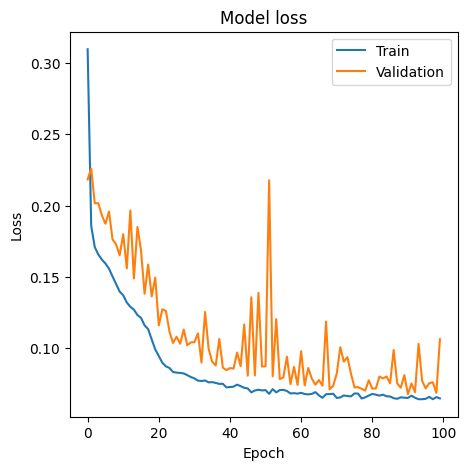

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Optimum fitting: If the training score & validation
score consistently decreases with increasing complexity.

**1)Residual plot**

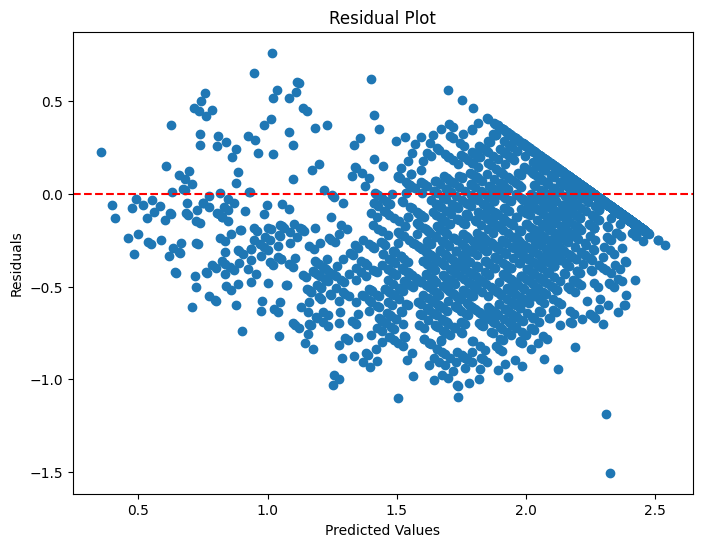

In [ ]:
residuals = Y_test - Y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

**2)Prediction vs Actual:**

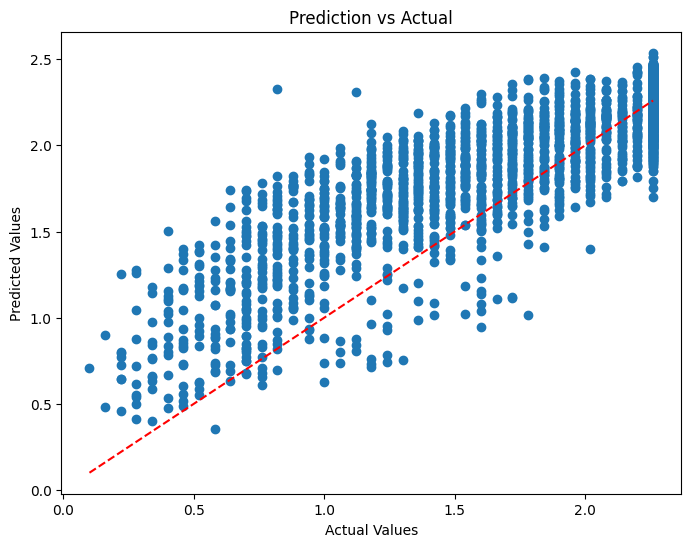

In [ ]:
# Assuming 'Y_test' and 'Y_pred' are your true and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
# Plot a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.show()


almost 60% points clustered tightly around the diagonal line,
indicating that the predictions are very close to the actual
values with minimal deviations

3. Error Distribution:

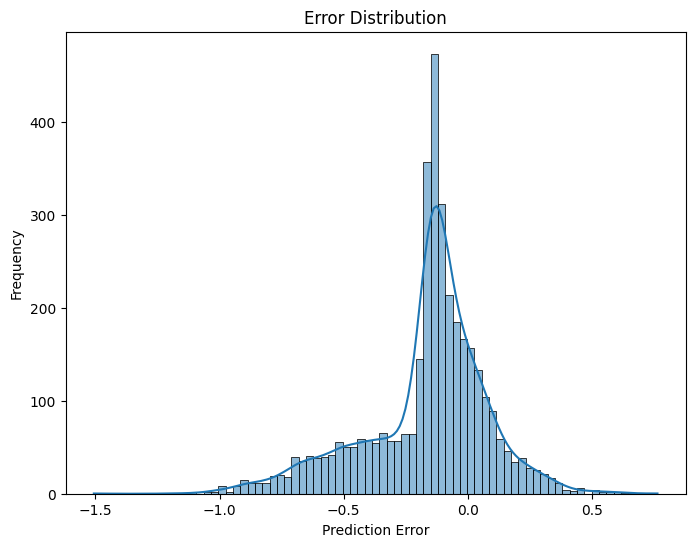

In [ ]:
import seaborn as sns
# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

#k-fold benchmarking for junction-1

In [ ]:
# X and Y are features and target variable respectively
# X should be a 3D array of shape (samples, timesteps, features)
# Y should be a 1D array of shape (samples,)
X_array = np.array(X)
Y_array = np.array(Y)
X_array = X_array.reshape(X_array.shape[0], X_array.shape[1], 1)
X_array.shape

(14568, 24, 1)

In [ ]:
rmse_scores = []
mae_scores = []
r2_scores = []

In [ ]:
n_splits = 4  # Number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

for train_index, test_index in tscv.split(X_array):#train data will be old data and test data will be new data
    X_train, X_test = X_array[train_index], X_array[test_index]
    Y_train, Y_test = Y_array[train_index],Y_array[test_index]

    # Build and train your LSTM model here
    model1 = Sequential()
    model1.add(LSTM(4, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model1.add(LSTM(2, activation='relu', return_sequences=False))
    model1.add(Dense(1))
    model1.compile(optimizer='adam', loss='mse')
    history1=model1.fit(X_train, Y_train, epochs=50, batch_size=5,validation_split=0.2)  # Adjust epochs and batch_size as needed

    #Evaluate the model on the test set
    y_pred = model1.predict(X_test)
    rmse_scores.append(mean_squared_error(Y_test, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(Y_test, y_pred))
    r2_scores.append(r2_score(Y_test, y_pred))

Epoch 1/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - loss: 0.2274 - val_loss: 0.3522
Epoch 2/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.1974 - val_loss: 0.2794
Epoch 3/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1737 - val_loss: 0.2965
Epoch 4/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1491 - val_loss: 0.3552
Epoch 5/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1474 - val_loss: 0.3564
Epoch 6/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1447 - val_loss: 0.3217
Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.1379 - val_loss: 0.3422
Epoch 8/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.1349 - val_loss: 0.2928
Epoch 9/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.1355 - val_loss: 0.3049
Epoch 10/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.1293 - val_loss: 0.2672
Epoch 11/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.1297 - val_loss: 0.2611
Epoch 12/50
467/467 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


933/933 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.4236 - val_loss: 0.9634
Epoch 2/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.3878 - val_loss: 0.9554
Epoch 3/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.3852 - val_loss: 0.9568
Epoch 4/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.3897 - val_loss: 0.9541
Epoch 5/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.3881 - val_loss: 0.9549
Epoch 6/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.3780 - val_loss: 0.9472
Epoch 7/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - loss: 0.3892 - val_loss: 0.9622
Epoch 8/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.3798 - val_loss: 0.9557
Epoch 9/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.3735 - val_loss: 0.9467
Epoch 10/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.3889 - val_loss: 0.9576
Epoch 11/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.3826 - val_loss: 0.9610
Epoch 12/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1399/1399 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - loss: 0.4598 - val_loss: 0.0969
Epoch 2/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 3/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0725 - val_loss: 0.0995
Epoch 4/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 0.0701 - val_loss: 0.0735
Epoch 5/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0656 - val_loss: 0.0759
Epoch 6/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 24s 17ms/step - loss: 0.0627 - val_loss: 0.0827
Epoch 7/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0596 - val_loss: 0.0697
Epoch 8/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0588 - val_loss: 0.0689
Epoch 9/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - loss: 0.0608 - val_loss: 0.0691
Epoch 10/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0609 - val_loss: 0.0761
Epoch 11/50
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0628 - val_loss: 0.0905
Epoch 12/50
1399/13

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1865/1865 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - loss: 0.3603 - val_loss: 0.1275
Epoch 2/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - loss: 0.0966 - val_loss: 0.0744
Epoch 3/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - loss: 0.0689 - val_loss: 0.0474
Epoch 4/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0611 - val_loss: 0.0581
Epoch 5/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 0.0574 - val_loss: 0.0546
Epoch 6/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 0.0556 - val_loss: 0.0553
Epoch 7/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0564 - val_loss: 0.0540
Epoch 8/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - loss: 0.0562 - val_loss: 0.0611
Epoch 9/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - loss: 0.0547 - val_loss: 0.0437
Epoch 10/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0536 - val_loss: 0.0466
Epoch 11/50
1865/1865 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0540 - val_loss: 0.0503
Epoch 12/50
1865/18

**Calculate mean scores**

In [ ]:
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)
print("Mean R-squared:", mean_r2)

Mean RMSE: 0.5289238792349678
Mean MAE: 0.4210440469454829
Mean R-squared: 0.2577539878914018


**LSTM for Junction 2**

In [ ]:
df_lstm_Junction_2.head()


,Junction,Vehicles,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
DateTime,,,,,,,,,,,,,,,,,,,,,
2015-11-02 00:00:00,2,-0.799820,-1.039834,-0.739817,-0.979831,-0.919827,-0.859824,-0.799820,-0.859824,-0.799820,...,-1.099838,-1.099838,-1.039834,-1.039834,-1.159841,-0.859824,-0.919827,-0.979831,-0.919827,-0.919827
2015-11-02 01:00:00,2,-0.919827,-0.799820,-1.039834,-0.739817,-0.979831,-0.919827,-0.859824,-0.799820,-0.859824,...,-0.799820,-1.099838,-1.099838,-1.039834,-1.039834,-1.159841,-0.859824,-0.919827,-0.979831,-0.919827
2015-11-02 02:00:00,2,-0.799820,-0.919827,-0.799820,-1.039834,-0.739817,-0.979831,-0.919827,-0.859824,-0.799820,...,-0.979831,-0.799820,-1.099838,-1.099838,-1.039834,-1.039834,-1.159841,-0.859824,-0.919827,-0.979831
2015-11-02 03:00:00,2,-0.979831,-0.799820,-0.919827,-0.799820,-1.039834,-0.739817,-0.979831,-0.919827,-0.859824,...,-0.919827,-0.979831,-0.799820,-1.099838,-1.099838,-1.039834,-1.039834,-1.159841,-0.859824,-0.919827
2015-11-02 04:00:00,2,-1.099838,-0.979831,-0.799820,-0.919827,-0.799820,-1.039834,-0.739817,-0.979831,-0.919827,...,-0.919827,-0.919827,-0.979831,-0.799820,-1.099838,-1.099838,-1.039834,-1.039834,-1.159841,-0.859824


In [ ]:
df_lstm_Junction_2.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14568 entries, 2015-11-02 00:00:00 to 2017-06-30 23:00:00
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Junction  14568 non-null  int64  
 1   Vehicles  14568 non-null  float64
 2   lag1      14568 non-null  float64
 3   lag2      14568 non-null  float64
 4   lag3      14568 non-null  float64
 5   lag4      14568 non-null  float64
 6   lag5      14568 non-null  float64
 7   lag6      14568 non-null  float64
 8   lag7      14568 non-null  float64
 9   lag8      14568 non-null  float64
 10  lag9      14568 non-null  float64
 11  lag10     14568 non-null  float64
 12  lag11     14568 non-null  float64
 13  lag12     14568 non-null  float64
 14  lag13     14568 non-null  float64
 15  lag14     14568 non-null  float64
 16  lag15     14568 non-null  float64
 17  lag16     14568 non-null  float64
 18  lag17     14568 non-null  float64
 19  lag18     14568 non-null  float6

In [ ]:
#Split X and Y
X = df_lstm_Junction_2.drop(['Junction','Vehicles'],axis=1)
Y = df_lstm_Junction_2['Vehicles']
#time series Split
from sklearn.model_selection import TimeSeriesSplit
tss_1 = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tss_1.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
X_test.head()



,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-30 06:00:00,-0.739817,-0.439800,-0.559807,-0.619810,-0.559807,-0.319793,-0.499803,-0.319793,-0.379796,-0.559807,...,-0.739817,-0.619810,-0.739817,-0.559807,-0.559807,-0.679813,-0.739817,-0.859824,-0.739817,-0.739817
2017-01-30 07:00:00,-0.739817,-0.739817,-0.439800,-0.559807,-0.619810,-0.559807,-0.319793,-0.499803,-0.319793,-0.379796,...,-0.499803,-0.739817,-0.619810,-0.739817,-0.559807,-0.559807,-0.679813,-0.739817,-0.859824,-0.739817
2017-01-30 08:00:00,-0.559807,-0.739817,-0.739817,-0.439800,-0.559807,-0.619810,-0.559807,-0.319793,-0.499803,-0.319793,...,-0.679813,-0.499803,-0.739817,-0.619810,-0.739817,-0.559807,-0.559807,-0.679813,-0.739817,-0.859824
2017-01-30 09:00:00,-0.619810,-0.559807,-0.739817,-0.739817,-0.439800,-0.559807,-0.619810,-0.559807,-0.319793,-0.499803,...,-0.499803,-0.679813,-0.499803,-0.739817,-0.619810,-0.739817,-0.559807,-0.559807,-0.679813,-0.739817
2017-01-30 10:00:00,-0.619810,-0.619810,-0.559807,-0.739817,-0.739817,-0.439800,-0.559807,-0.619810,-0.559807,-0.319793,...,-0.439800,-0.499803,-0.679813,-0.499803,-0.739817,-0.619810,-0.739817,-0.559807,-0.559807,-0.679813


In [ ]:
import numpy as np
X_train_rnn = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))
X_train_rnn.shape, X_test_rnn.shape

((10926, 24, 1), (3642, 24, 1))

In [ ]:
# Define the model
model2 = Sequential()
model2.add(LSTM(2, activation='relu',return_sequences=True, input_shape=(12,1)))
# First LSTM layer with 4 units, ReLU activation, and returning sequences for the next layer
model2.add(LSTM(1, activation='relu'))
# Second LSTM layer with 2 units and ReLU activation, no need to return sequences as this is the last LSTM layer
model2.add(Dense(1))
# Output layer with a single neuron for regression
model2.compile(optimizer='adam', loss='mse')
# Compile the model with Adam optimizer and mean squared error loss
history2 = model2.fit(X_train, Y_train,
                     validation_split=0.1,
                     epochs =100, batch_size =10)
# Predict on the test set
Y_pred= model2.predict(X_test_rnn)
Y_pred = Y_pred.flatten()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


984/984 ━━━━━━━━━━━━━━━━━━━━ 34s 28ms/step - loss: 0.2548 - val_loss: 0.0829
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - loss: 0.0690 - val_loss: 0.0922
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 47s 28ms/step - loss: 0.0687 - val_loss: 0.0923
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - loss: 0.0671 - val_loss: 0.0925
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 37s 27ms/step - loss: 0.0683 - val_loss: 0.0957
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 0.0670 - val_loss: 0.0930
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - loss: 0.0667 - val_loss: 0.0934
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 38s 27ms/step - loss: 0.0683 - val_loss: 0.0954
Epoch 9/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - loss: 0.0684 - val_loss: 0.0938
Epoch 10/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - loss: 0.0672 - val_loss: 0.0946
Epoch 11/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0667 - val_loss: 0.0922
Epoch 12/100
984/984 ━━━━━━━━━━

In [ ]:
# Calculate evaluation metrics
rmse_lstm1 = mean_squared_error(Y_test, Y_pred, squared=False)
print("RMSE:", rmse_lstm1)
r2_lstm1 = r2_score(Y_test, Y_pred)
print("R-squared:", r2_lstm1)
mae_lstm1 = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae_lstm1)

RMSE: 0.8431044580636126
R-squared: -2.0543353772939525
Mean Absolute Error: 0.6973612595626341


1)check for overfitting or under fitting


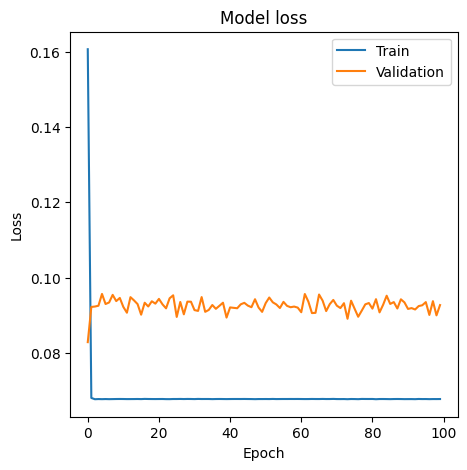

In [ ]:
# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Optimum fitting: If the training score & validation
score consistently decreases with increasing complexity.


2)Residual plot

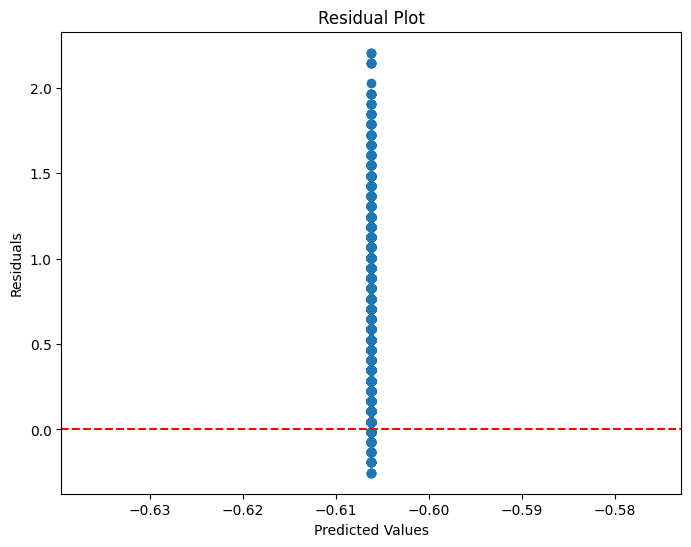

In [ ]:
residuals = Y_test - Y_pred
# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


3)Prediction vs Actual:

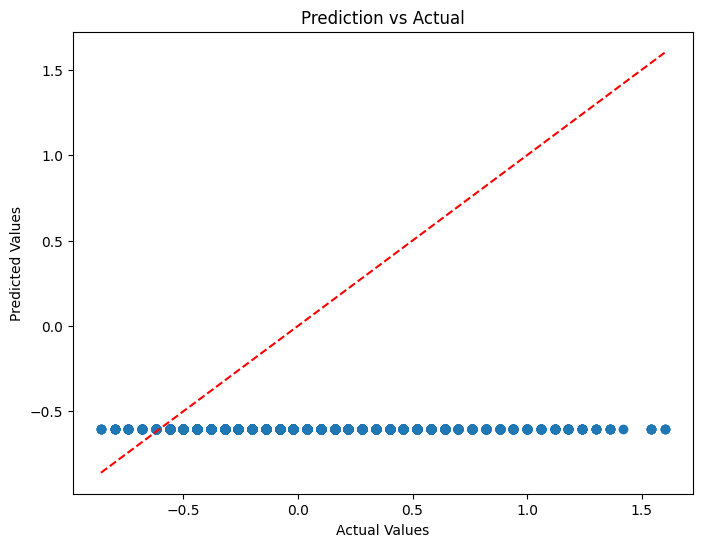

In [ ]:
# Assuming 'Y_test' and 'Y_pred' are your true and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
# Plot a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.show()

almost 60% points clustered tightly around the diagonal line,
indicating that the predictions are very close to the actual
values with minimal deviations

4.Error Distribution:


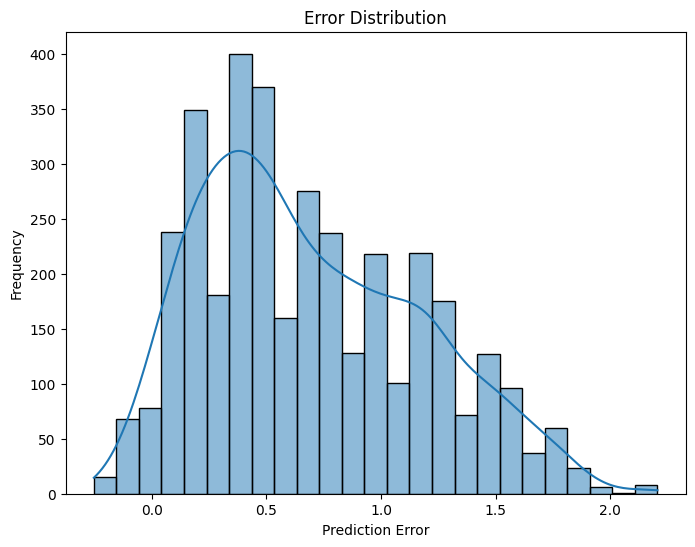

In [ ]:
import seaborn as sns
# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()


#k-fold benchmarking for junction-2


In [ ]:
# X and Y are features and target variable respectively
# X should be a 3D array of shape (samples, timesteps, features)
# Y should be a 1D array of shape (samples,)
X_array = np.array(X)
Y_array = np.array(Y)
X_array = X_array.reshape(X_array.shape[0], X_array.shape[1], 1)
X_array.shape

(14568, 24, 1)

In [ ]:
rmse_scores = []
mae_scores = []
r2_scores = []
n_splits = 2  # Number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X_array):#train data will be old data and test data will be new data
    X_train, X_test = X_array[train_index], X_array[test_index]
    Y_train, Y_test = Y_array[train_index],Y_array[test_index]

    # Build and train your LSTM model here
    model2f = Sequential()
    model2f.add(LSTM(4, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model2f.add(LSTM(2, activation='relu', return_sequences=False))
    model2f.add(Dense(1))
    model2f.compile(optimizer='adam', loss='mse')
    history2f=model2f.fit(X_train, Y_train, epochs=50, batch_size=5,validation_split=0.2)  # Adjust epochs and batch_size as needed

    #Evaluate the model on the test set
    y_pred = model2f.predict(X_test)
    rmse_scores.append(mean_squared_error(Y_test, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(Y_test, y_pred))
    r2_scores.append(r2_score(Y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


777/777 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - loss: 0.3746 - val_loss: 0.0509
Epoch 2/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0563 - val_loss: 0.0714
Epoch 3/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.0399 - val_loss: 0.0758
Epoch 4/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0372 - val_loss: 0.0747
Epoch 5/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0457 - val_loss: 0.0741
Epoch 6/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0392 - val_loss: 0.0733
Epoch 7/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0446 - val_loss: 0.0767
Epoch 8/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0419 - val_loss: 0.0469
Epoch 9/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0276 - val_loss: 0.0370
Epoch 10/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0223 - val_loss: 0.0292
Epoch 11/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0249 - val_loss: 0.0264
Epoch 12/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1554/1554 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 0.2381 - val_loss: 0.1208
Epoch 2/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0578 - val_loss: 0.1227
Epoch 3/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0569 - val_loss: 0.1228
Epoch 4/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0593 - val_loss: 0.1216
Epoch 5/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0549 - val_loss: 0.1219
Epoch 6/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0568 - val_loss: 0.1224
Epoch 7/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0568 - val_loss: 0.1299
Epoch 8/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0560 - val_loss: 0.1162
Epoch 9/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0563 - val_loss: 0.1235
Epoch 10/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - loss: 19389892.0000 - val_loss: 0.0720
Epoch 11/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - loss: 0.0407 - val_loss: 0.0712
Epoch 12/50


In [ ]:
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)
print("Mean R-squared:", mean_r2)


Mean RMSE: 0.3048051103238517
Mean MAE: 0.2231565426752965
Mean R-squared: 0.42287996856524296


LSTM for Junction 3

In [ ]:
df_lstm_Junction_3.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14568 entries, 2015-11-02 00:00:00 to 2017-06-30 23:00:00
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Junction  14568 non-null  int64  
 1   Vehicles  14568 non-null  float64
 2   lag1      14568 non-null  float64
 3   lag2      14568 non-null  float64
 4   lag3      14568 non-null  float64
 5   lag4      14568 non-null  float64
 6   lag5      14568 non-null  float64
 7   lag6      14568 non-null  float64
 8   lag7      14568 non-null  float64
 9   lag8      14568 non-null  float64
 10  lag9      14568 non-null  float64
 11  lag10     14568 non-null  float64
 12  lag11     14568 non-null  float64
 13  lag12     14568 non-null  float64
 14  lag13     14568 non-null  float64
 15  lag14     14568 non-null  float64
 16  lag15     14568 non-null  float64
 17  lag16     14568 non-null  float64
 18  lag17     14568 non-null  float64
 19  lag18     14568 non-null  float6

In [ ]:
#Split X and Y
X = df_lstm_Junction_3.drop(['Junction','Vehicles'],axis=1)
Y = df_lstm_Junction_3['Vehicles']
#time series Split
from sklearn.model_selection import TimeSeriesSplit
tss_1 = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tss_1.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
X_test.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-30 06:00:00,-0.499803,-0.619810,-0.319793,-0.379796,-0.379796,-0.619810,-0.439800,-0.739817,-0.679813,-0.379796,...,-0.679813,-0.559807,-0.619810,-0.619810,-0.739817,-0.619810,-0.679813,-0.919827,-0.799820,-0.979831
2017-01-30 07:00:00,-0.739817,-0.499803,-0.619810,-0.319793,-0.379796,-0.379796,-0.619810,-0.439800,-0.739817,-0.679813,...,-0.559807,-0.679813,-0.559807,-0.619810,-0.619810,-0.739817,-0.619810,-0.679813,-0.919827,-0.799820
2017-01-30 08:00:00,-0.379796,-0.739817,-0.499803,-0.619810,-0.319793,-0.379796,-0.379796,-0.619810,-0.439800,-0.739817,...,-0.679813,-0.559807,-0.679813,-0.559807,-0.619810,-0.619810,-0.739817,-0.619810,-0.679813,-0.919827
2017-01-30 09:00:00,-0.559807,-0.379796,-0.739817,-0.499803,-0.619810,-0.319793,-0.379796,-0.379796,-0.619810,-0.439800,...,-0.379796,-0.679813,-0.559807,-0.679813,-0.559807,-0.619810,-0.619810,-0.739817,-0.619810,-0.679813
2017-01-30 10:00:00,-0.199786,-0.559807,-0.379796,-0.739817,-0.499803,-0.619810,-0.319793,-0.379796,-0.379796,-0.619810,...,-0.499803,-0.379796,-0.679813,-0.559807,-0.679813,-0.559807,-0.619810,-0.619810,-0.739817,-0.619810


In [ ]:
import numpy as np
X_train_rnn = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))
X_train_rnn.shape, X_test_rnn.shape


((10926, 24, 1), (3642, 24, 1))

In [ ]:
# Define the model
model3 = Sequential()
model3.add(LSTM(2, activation='relu',return_sequences=True, input_shape=(12,1)))
# First LSTM layer with 4 units, ReLU activation, and returning sequences for the next layer
model3.add(LSTM(1, activation='relu'))
# Second LSTM layer with 2 units and ReLU activation, no need to return sequences as this is the last LSTM layer
model3.add(Dense(1))
# Output layer with a single neuron for regression
model3.compile(optimizer='adam', loss='mse')
# Compile the model with Adam optimizer and mean squared error loss
history3 = model3.fit(X_train, Y_train,
                     validation_split=0.1,
                     epochs =100, batch_size =10)
# Predict on the test set
Y_pred= model3.predict(X_test_rnn)
Y_pred = Y_pred.flatten()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


984/984 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.8345 - val_loss: 0.2619
Epoch 2/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.2332 - val_loss: 0.2756
Epoch 3/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.2275 - val_loss: 0.2614
Epoch 4/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.2117 - val_loss: 0.2483
Epoch 5/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1881 - val_loss: 0.2184
Epoch 6/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - loss: 0.1891 - val_loss: 0.2039
Epoch 7/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1547 - val_loss: 0.1834
Epoch 8/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - loss: 0.1517 - val_loss: 0.1690
Epoch 9/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1282 - val_loss: 0.1498
Epoch 10/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1210 - val_loss: 0.1352
Epoch 11/100
984/984 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1096 - val_loss: 0.1140
Epoch 12/100
984/984 ━━━━━━━━━━

In [ ]:
# Calculate evaluation metrics
rmse_lstm1 = mean_squared_error(Y_test, Y_pred, squared=False)
print("RMSE:", rmse_lstm1)
r2_lstm1 = r2_score(Y_test, Y_pred)
print("R-squared:", r2_lstm1)
mae_lstm1 = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae_lstm1)


RMSE: 0.2917749323522624
R-squared: 0.7611280511051941
Mean Absolute Error: 0.19798482743639645


1)check for overfitting or under fitting

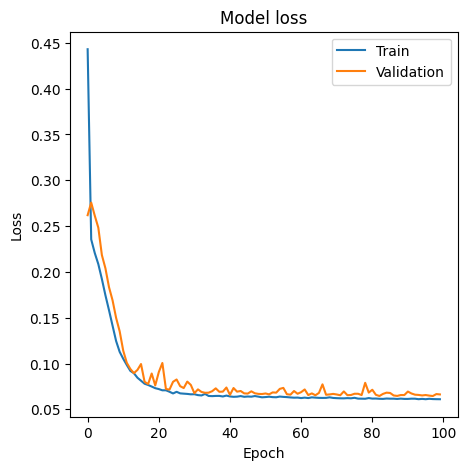

In [ ]:
# Plot training & validation loss values
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Optimum fitting: If the training score & validation
score consistently decreases with increasing complexity.


2)Residual plot

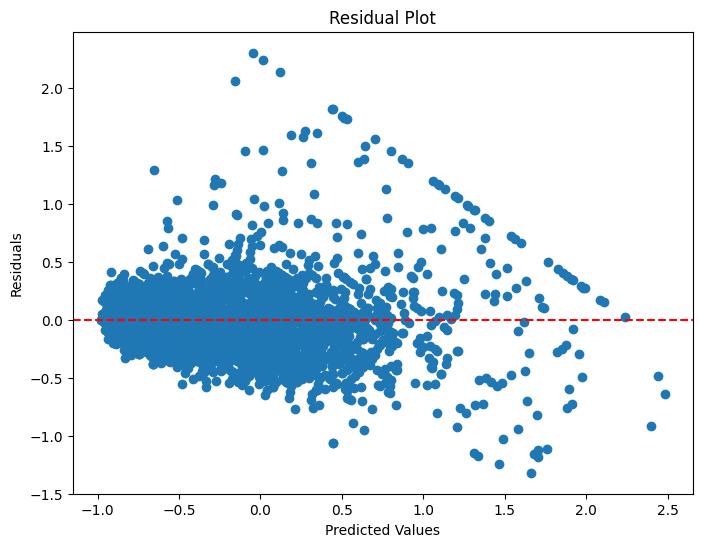

In [ ]:
residuals = Y_test - Y_pred
# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

3)Prediction vs Actual:

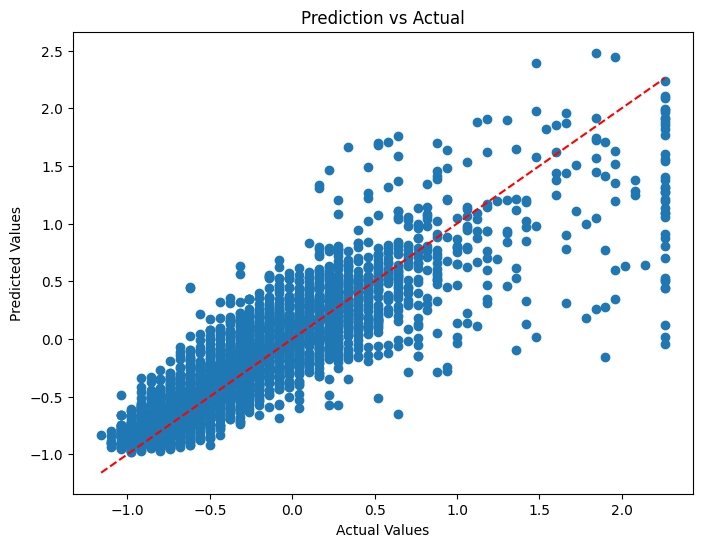

In [ ]:
# Assuming 'Y_test' and 'Y_pred' are your true and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
# Plot a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.show()

almost 70% points clustered tightly around the diagonal line,
indicating that the predictions are very close to the actual
values with minimal deviations

4.Error Distribution:

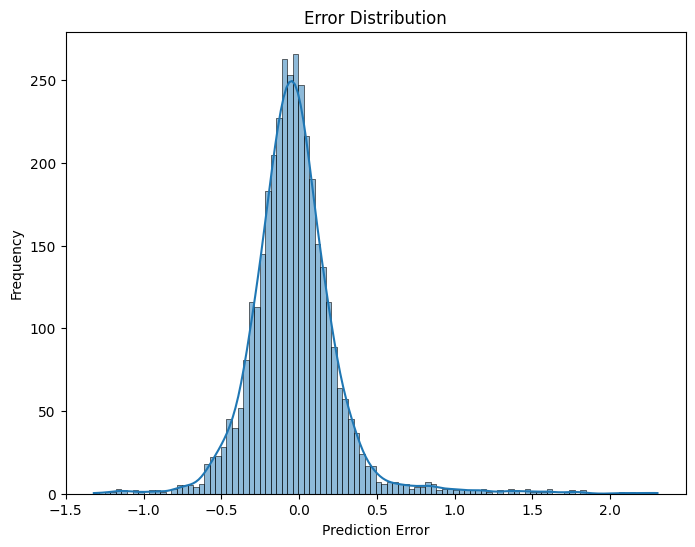

In [ ]:
import seaborn as sns
# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

#k-fold benchmarking for junction-3

In [ ]:
# X and Y are features and target variable respectively
# X should be a 3D array of shape (samples, timesteps, features)
# Y should be a 1D array of shape (samples,)
X_array = np.array(X)
Y_array = np.array(Y)
X_array = X_array.reshape(X_array.shape[0], X_array.shape[1], 1)
X_array.shape

(14568, 24, 1)

In [ ]:
rmse_scores = []
mae_scores = []
r2_scores = []
n_splits = 2  # Number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X_array):#train data will be old data and test data will be new data
    X_train, X_test = X_array[train_index], X_array[test_index]
    Y_train, Y_test = Y_array[train_index],Y_array[test_index]
    # Build and train your LSTM model here
    model3f = Sequential()
    model3f.add(LSTM(4, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model3f.add(LSTM(2, activation='relu', return_sequences=False))
    model3f.add(Dense(1))
    model3f.compile(optimizer='adam', loss='mse')
    history3f=model3f.fit(X_train, Y_train, epochs=50, batch_size=5,validation_split=0.2)  # Adjust epochs and batch_size as needed
    #Evaluate the model on the test set
    y_pred = model3f.predict(X_test)
    rmse_scores.append(mean_squared_error(Y_test, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(Y_test, y_pred))
    r2_scores.append(r2_score(Y_test, y_pred))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


777/777 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - loss: 0.4212 - val_loss: 0.2971
Epoch 2/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.1353 - val_loss: 0.2891
Epoch 3/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1311 - val_loss: 0.2801
Epoch 4/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1406 - val_loss: 0.2670
Epoch 5/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - loss: 0.1251 - val_loss: 0.2501
Epoch 6/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1130 - val_loss: 0.2396
Epoch 7/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.1152 - val_loss: 0.2121
Epoch 8/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.1021 - val_loss: 0.2051
Epoch 9/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0928 - val_loss: 0.1758
Epoch 10/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.0814 - val_loss: 0.1716
Epoch 11/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - loss: 0.0852 - val_loss: 0.1623
Epoch 12/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1554/1554 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - loss: 0.2414 - val_loss: 0.1456
Epoch 2/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.1031 - val_loss: 0.1266
Epoch 3/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.1021 - val_loss: 0.1116
Epoch 4/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0793 - val_loss: 0.1080
Epoch 5/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0771 - val_loss: 0.1026
Epoch 6/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0716 - val_loss: 0.1054
Epoch 7/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0703 - val_loss: 0.0889
Epoch 8/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0738 - val_loss: 0.0882
Epoch 9/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0746 - val_loss: 0.0834
Epoch 10/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - loss: 0.0649 - val_loss: 0.0926
Epoch 11/50
1554/1554 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - loss: 0.0679 - val_loss: 0.0864
Epoch 12/50
1554/15

In [ ]:
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)
print("Mean R-squared:", mean_r2)

Mean RMSE: 0.2802372209821079
Mean MAE: 0.18857977481349444
Mean R-squared: 0.7367933043569773


LSTM for Junction 4

In [ ]:
df_lstm_Junction_4.head()

,Junction,Vehicles,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00,4,-0.859824,-0.799820,-1.039834,-0.919827,-0.799820,-1.099838,-1.159841,-0.919827,-0.919827,...,-1.159841,-1.039834,-1.039834,-1.219845,-1.219845,-1.159841,-1.039834,-1.039834,-1.219845,-1.099838
2017-01-02 01:00:00,4,-0.979831,-0.859824,-0.799820,-1.039834,-0.919827,-0.799820,-1.099838,-1.159841,-0.919827,...,-1.159841,-1.159841,-1.039834,-1.039834,-1.219845,-1.219845,-1.159841,-1.039834,-1.039834,-1.219845
2017-01-02 02:00:00,4,-1.099838,-0.979831,-0.859824,-0.799820,-1.039834,-0.919827,-0.799820,-1.099838,-1.159841,...,-0.979831,-1.159841,-1.159841,-1.039834,-1.039834,-1.219845,-1.219845,-1.159841,-1.039834,-1.039834
2017-01-02 03:00:00,4,-0.979831,-1.099838,-0.979831,-0.859824,-0.799820,-1.039834,-0.919827,-0.799820,-1.099838,...,-1.039834,-0.979831,-1.159841,-1.159841,-1.039834,-1.039834,-1.219845,-1.219845,-1.159841,-1.039834
2017-01-02 04:00:00,4,-1.159841,-0.979831,-1.099838,-0.979831,-0.859824,-0.799820,-1.039834,-0.919827,-0.799820,...,-0.919827,-1.039834,-0.979831,-1.159841,-1.159841,-1.039834,-1.039834,-1.219845,-1.219845,-1.159841


In [ ]:
df_lstm_Junction_4.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4320 entries, 2017-01-02 00:00:00 to 2017-06-30 23:00:00
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Junction  4320 non-null   int64  
 1   Vehicles  4320 non-null   float64
 2   lag1      4320 non-null   float64
 3   lag2      4320 non-null   float64
 4   lag3      4320 non-null   float64
 5   lag4      4320 non-null   float64
 6   lag5      4320 non-null   float64
 7   lag6      4320 non-null   float64
 8   lag7      4320 non-null   float64
 9   lag8      4320 non-null   float64
 10  lag9      4320 non-null   float64
 11  lag10     4320 non-null   float64
 12  lag11     4320 non-null   float64
 13  lag12     4320 non-null   float64
 14  lag13     4320 non-null   float64
 15  lag14     4320 non-null   float64
 16  lag15     4320 non-null   float64
 17  lag16     4320 non-null   float64
 18  lag17     4320 non-null   float64
 19  lag18     4320 non-null   float64

In [ ]:
#Split X and Y
X = df_lstm_Junction_4.drop(['Junction','Vehicles'],axis=1)
Y = df_lstm_Junction_4['Vehicles']
#time series Split
from sklearn.model_selection import TimeSeriesSplit
tss_1 = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tss_1.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
X_test.head()

,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,...,lag15,lag16,lag17,lag18,lag19,lag20,lag21,lag22,lag23,lag24
DateTime,,,,,,,,,,,,,,,,,,,,,
2017-05-17 00:00:00,-0.739817,-0.919827,-0.979831,-0.739817,-0.799820,-0.919827,-0.739817,-0.799820,-0.619810,-0.919827,...,-0.859824,-1.039834,-0.859824,-1.039834,-1.159841,-0.979831,-1.039834,-1.039834,-1.099838,-1.039834
2017-05-17 01:00:00,-0.799820,-0.739817,-0.919827,-0.979831,-0.739817,-0.799820,-0.919827,-0.739817,-0.799820,-0.619810,...,-0.739817,-0.859824,-1.039834,-0.859824,-1.039834,-1.159841,-0.979831,-1.039834,-1.039834,-1.099838
2017-05-17 02:00:00,-1.159841,-0.799820,-0.739817,-0.919827,-0.979831,-0.739817,-0.799820,-0.919827,-0.739817,-0.799820,...,-0.619810,-0.739817,-0.859824,-1.039834,-0.859824,-1.039834,-1.159841,-0.979831,-1.039834,-1.039834
2017-05-17 03:00:00,-1.099838,-1.159841,-0.799820,-0.739817,-0.919827,-0.979831,-0.739817,-0.799820,-0.919827,-0.739817,...,-0.679813,-0.619810,-0.739817,-0.859824,-1.039834,-0.859824,-1.039834,-1.159841,-0.979831,-1.039834
2017-05-17 04:00:00,-1.159841,-1.099838,-1.159841,-0.799820,-0.739817,-0.919827,-0.979831,-0.739817,-0.799820,-0.919827,...,-0.739817,-0.679813,-0.619810,-0.739817,-0.859824,-1.039834,-0.859824,-1.039834,-1.159841,-0.979831


In [ ]:
import numpy as np
X_train_rnn = np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], 1))
X_train_rnn.shape, X_test_rnn.shape


((3240, 24, 1), (1080, 24, 1))

In [ ]:
# Define the model
model4 = Sequential()
model4.add(LSTM(2, activation='relu',return_sequences=True, input_shape=(12,1)))
# First LSTM layer with 4 units, ReLU activation, and returning sequences for the next layer
model4.add(LSTM(1, activation='relu'))
# Second LSTM layer with 2 units and ReLU activation, no need to return sequences as this is the last LSTM layer
model4.add(Dense(1))
# Output layer with a single neuron for regression
model4.compile(optimizer='adam', loss='mse')
# Compile the model with Adam optimizer and mean squared error loss
history4 = model4.fit(X_train, Y_train,
                     validation_split=0.1,
                     epochs =100, batch_size =10)
# Predict on the test set
Y_pred= model4.predict(X_test_rnn)
Y_pred = Y_pred.flatten()

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


292/292 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.2549 - val_loss: 0.0281
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0426 - val_loss: 0.0255
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0394 - val_loss: 0.0232
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0367 - val_loss: 0.0216
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0343 - val_loss: 0.0209
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 0.0327 - val_loss: 0.0207
Epoch 7/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0320 - val_loss: 0.0192
Epoch 8/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0275 - val_loss: 0.0188
Epoch 9/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0284 - val_loss: 0.0190
Epoch 10/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0253 - val_loss: 0.0174
Epoch 11/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0246 - val_loss: 0.0194
Epoch 12/100
292/292 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Calculate evaluation metrics
rmse_lstm1 = mean_squared_error(Y_test, Y_pred, squared=False)
print("RMSE:", rmse_lstm1)
r2_lstm1 = r2_score(Y_test, Y_pred)
print("R-squared:", r2_lstm1)
mae_lstm1 = mean_absolute_error(Y_test, Y_pred)
print("Mean Absolute Error:", mae_lstm1)

RMSE: 0.17124771522392784
R-squared: 0.5059712062603199
Mean Absolute Error: 0.12327988034100718


1)check for overfitting or under fitting

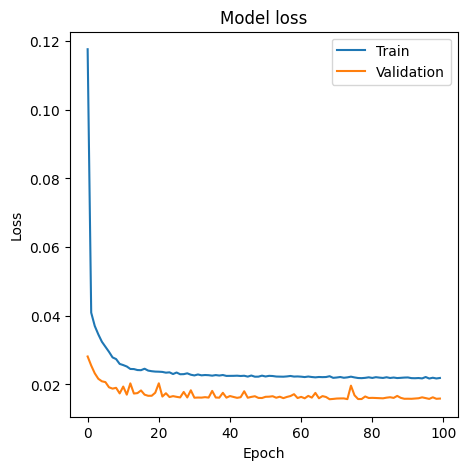

In [ ]:
# Plot training & validation loss values
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Optimum fitting: If the training score & validation
score consistently decreases with increasing complexity.


2)Residual plot

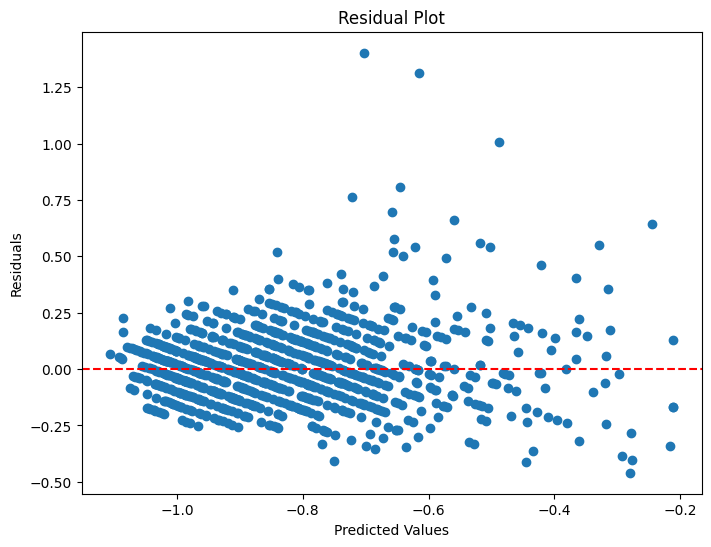

In [ ]:
residuals = Y_test - Y_pred
# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

3)Prediction vs Actual:

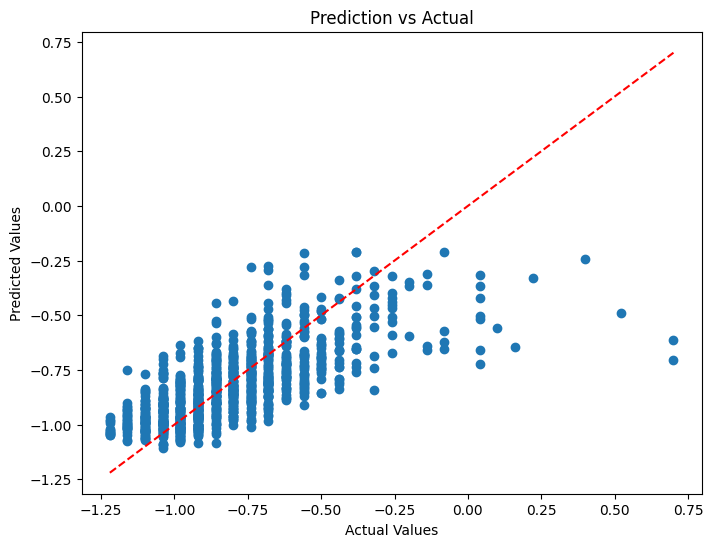

In [ ]:
# Assuming 'Y_test' and 'Y_pred' are your true and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual")
# Plot a diagonal line for reference
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.show()

almost 60% points clustered tightly around the diagonal line,
indicating that the predictions are very close to the actual
values with minimal deviations


4. Error Distribution:

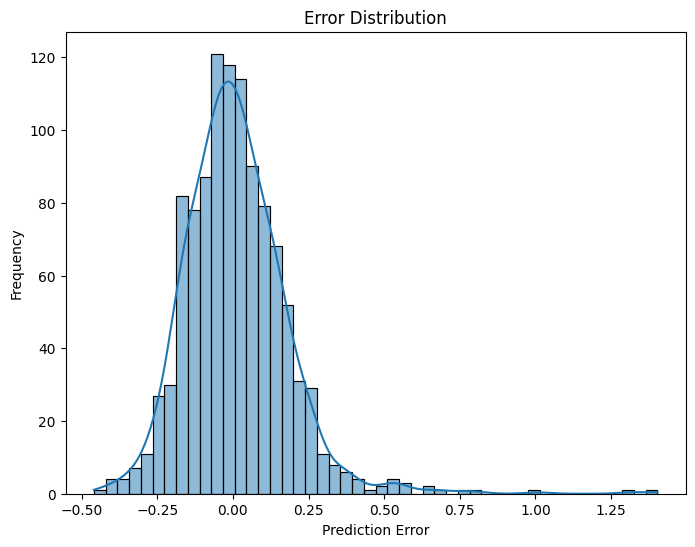

In [ ]:
import seaborn as sns
# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()

#k-fold benchmarking for junction-4


In [ ]:
# X and Y are features and target variable respectively
# X should be a 3D array of shape (samples, timesteps, features)
# Y should be a 1D array of shape (samples,)
X_array = np.array(X)
Y_array = np.array(Y)
X_array = X_array.reshape(X_array.shape[0], X_array.shape[1], 1)
X_array.shape

(4320, 24, 1)

In [ ]:
rmse_scores = []
mae_scores = []
r2_scores = []
n_splits = 2  # Number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)
for train_index, test_index in tscv.split(X_array):#train data will be old data and test data will be new data
    X_train, X_test = X_array[train_index], X_array[test_index]
    Y_train, Y_test = Y_array[train_index],Y_array[test_index]
    # Build and train your LSTM model here
    model4f = Sequential()
    model4f.add(LSTM(4, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
    model4f.add(LSTM(2, activation='relu', return_sequences=False))
    model4f.add(Dense(1))
    model4f.compile(optimizer='adam', loss='mse')
    history4f=model4f.fit(X_train, Y_train, epochs=50, batch_size=5,validation_split=0.2)  # Adjust epochs and batch_size as needed
    #Evaluate the model on the test set
    y_pred = model4f.predict(X_test)
    rmse_scores.append(mean_squared_error(Y_test, y_pred, squared=False))
    mae_scores.append(mean_absolute_error(Y_test, y_pred))
    r2_scores.append(r2_score(Y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.6414 - val_loss: 0.0531
Epoch 2/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0458 - val_loss: 0.0517
Epoch 3/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0459 - val_loss: 0.0508
Epoch 4/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0439 - val_loss: 0.0509
Epoch 5/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0438 - val_loss: 0.0497
Epoch 6/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0419 - val_loss: 0.0499
Epoch 7/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0450 - val_loss: 0.0506
Epoch 8/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0445 - val_loss: 0.0539
Epoch 9/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0409 - val_loss: 0.0479
Epoch 10/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0453 - val_loss: 0.0473
Epoch 11/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0426 - val_loss: 0.0468
Epoch 12/50
231/231 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - loss: 0.5957 - val_loss: 0.2979
Epoch 2/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1753 - val_loss: 0.0994
Epoch 3/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0614 - val_loss: 0.0508
Epoch 4/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0418 - val_loss: 0.0414
Epoch 5/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0419 - val_loss: 0.0398
Epoch 6/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - loss: 0.0380 - val_loss: 0.0397
Epoch 7/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - loss: 0.0414 - val_loss: 0.0397
Epoch 8/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0404 - val_loss: 0.0404
Epoch 9/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - loss: 0.0409 - val_loss: 0.0399
Epoch 10/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0383 - val_loss: 0.0396
Epoch 11/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.0415 - val_loss: 0.0410
Epoch 12/50
461/461 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms

In [ ]:
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)
print("Mean RMSE:", mean_rmse)
print("Mean MAE:", mean_mae)
print("Mean R-squared:", mean_r2)

Mean RMSE: 0.19033960177741227
Mean MAE: 0.14270080407833918
Mean R-squared: 0.13432146956599572
